<a href="https://colab.research.google.com/github/sasekaninkuri/financial-health-prediction/blob/main/Untitled15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)


train_df = pd.read_csv('Train.csv')
train_df



ID   country  owner_age attitude_stable_business_environment  \
0     ID_3CFL0U  eswatini       63.0                                  Yes   
1     ID_XWI7G3  zimbabwe       39.0                                   No   
2     ID_TY93LV    malawi       34.0                    Don’t know or N/A   
3     ID_9OP2C8    malawi       28.0                                  Yes   
4     ID_13REYS  zimbabwe       43.0                                  Yes   
...         ...       ...        ...                                  ...   
9613  ID_D7NC2D   lesotho       31.0                                  Yes   
9614  ID_NT06RL    malawi       64.0                    Don’t know or N/A   
9615  ID_4TVWA3  zimbabwe       43.0                                  Yes   
9616  ID_3U3S2Z  zimbabwe       38.0                                  Yes   
9617  ID_4XGOHM  zimbabwe       38.0                                  Yes   

     attitude_worried_shutdown compliance_income_tax  \
0                           No                    No   
1                          Yes                   Yes   
2                           No                    No   
3                           No                    No   
4                           No                    No   
...                        ...                   ...   
9613                        No                    No   
9614         Don’t know or N/A                   Yes   
9615                        No                    No   
9616                       Yes                    No   
9617                       Yes                    No   

     perception_insurance_doesnt_cover_losses  \
0                                          No   
1                                          No   
2                                  Don't know   
3                                          No   
4                                         Yes   
...                                       ...   
9613                               Don't know   
9614                                       No   
9615                                      Yes   
9616                                       No   
9617                               Don't know   

     perception_cannot_afford_insurance  personal_income  business_expenses  \
0                                   Yes           3000.0             6000.0   
1                                   Yes              NaN                NaN   
2                                   Yes          30000.0             6000.0   
3                                    No         180000.0            60000.0   
4                                   Yes             50.0             2400.0   
...                                 ...              ...                ...   
9613                         Don't know           2000.0              800.0   
9614                                 No       10000000.0          5000000.0   
9615                                 No            450.0                NaN   
9616                                Yes           2000.0                NaN   
9617                         Don't know            600.0             1200.0   

      ...  has_internet_banking  has_debit_card future_risk_theft_stock  \
0     ...             Never had       Never had                     NaN   
1     ...                   NaN             NaN                      No   
2     ...             Never had       Never had                     Yes   
3     ...             Never had       Never had                      No   
4     ...                   NaN             NaN                      No   
...   ...                   ...             ...                     ...   
9613  ...                   NaN             NaN                     NaN   
9614  ...             Never had        Have now                     Yes   
9615  ...                   NaN             NaN                      No   
9616  ...                   NaN             NaN                      No   
9617  ...                   NaN             NaN     

In [80]:
cols_to_fix = [
    'attitude_stable_business_environment',
    'attitude_worried_shutdown'
]

for col in cols_to_fix:
    train_df[col] = train_df[col].replace("Don’t know or N/A", "Don’t know")



In [81]:
train_df

ID   country  owner_age attitude_stable_business_environment  \
0     ID_3CFL0U  eswatini       63.0                                  Yes   
1     ID_XWI7G3  zimbabwe       39.0                                   No   
2     ID_TY93LV    malawi       34.0                           Don’t know   
3     ID_9OP2C8    malawi       28.0                                  Yes   
4     ID_13REYS  zimbabwe       43.0                                  Yes   
...         ...       ...        ...                                  ...   
9613  ID_D7NC2D   lesotho       31.0                                  Yes   
9614  ID_NT06RL    malawi       64.0                           Don’t know   
9615  ID_4TVWA3  zimbabwe       43.0                                  Yes   
9616  ID_3U3S2Z  zimbabwe       38.0                                  Yes   
9617  ID_4XGOHM  zimbabwe       38.0                                  Yes   

     attitude_worried_shutdown compliance_income_tax  \
0                           No                    No   
1                          Yes                   Yes   
2                           No                    No   
3                           No                    No   
4                           No                    No   
...                        ...                   ...   
9613                        No                    No   
9614                Don’t know                   Yes   
9615                        No                    No   
9616                       Yes                    No   
9617                       Yes                    No   

     perception_insurance_doesnt_cover_losses  \
0                                          No   
1                                          No   
2                                  Don't know   
3                                          No   
4                                         Yes   
...                                       ...   
9613                               Don't know   
9614                                       No   
9615                                      Yes   
9616                                       No   
9617                               Don't know   

     perception_cannot_afford_insurance  personal_income  business_expenses  \
0                                   Yes           3000.0             6000.0   
1                                   Yes              NaN                NaN   
2                                   Yes          30000.0             6000.0   
3                                    No         180000.0            60000.0   
4                                   Yes             50.0             2400.0   
...                                 ...              ...                ...   
9613                         Don't know           2000.0              800.0   
9614                                 No       10000000.0          5000000.0   
9615                                 No            450.0                NaN   
9616                                Yes           2000.0                NaN   
9617                         Don't know            600.0             1200.0   

      ...  has_internet_banking  has_debit_card future_risk_theft_stock  \
0     ...             Never had       Never had                     NaN   
1     ...                   NaN             NaN                      No   
2     ...             Never had       Never had                     Yes   
3     ...             Never had       Never had                      No   
4     ...                   NaN             NaN                      No   
...   ...                   ...             ...                     ...   
9613  ...                   NaN             NaN                     NaN   
9614  ...             Never had        Have now                     Yes   
9615  ...                   NaN             NaN                      No   
9616  ...                   NaN             NaN                      No   
9617  ...                   NaN             NaN     

In [82]:
test_df = pd.read_csv('Test.csv')
test_df

ID   country  owner_age attitude_stable_business_environment  \
0     ID_5EGLKX  zimbabwe       50.0                                   No   
1     ID_4AI7RE   lesotho       36.0                                  Yes   
2     ID_V9OB3M   lesotho       25.0                    Don’t know or N/A   
3     ID_6OI9DI    malawi       25.0                    Don’t know or N/A   
4     ID_H2TN8B   lesotho       47.0                                   No   
...         ...       ...        ...                                  ...   
2400  ID_FX7XJZ  eswatini       29.0                                  Yes   
2401  ID_XAL1LX    malawi       20.0                    Don’t know or N/A   
2402  ID_UHBP0F  zimbabwe       26.0                                  Yes   
2403  ID_GKIKR2  eswatini       63.0                                   No   
2404  ID_O7P4HI  zimbabwe       25.0                                  Yes   

     attitude_worried_shutdown compliance_income_tax  \
0                           No                    No   
1                          Yes                    No   
2                           No                    No   
3                          Yes                    No   
4                          Yes                    No   
...                        ...                   ...   
2400                       Yes                    No   
2401         Don’t know or N/A                    No   
2402                       Yes                    No   
2403                        No                   Yes   
2404                        No                    No   

     perception_insurance_doesnt_cover_losses  \
0                                          No   
1                                         Yes   
2                                  Don't know   
3                                          No   
4                                  Don't know   
...                                       ...   
2400                                       No   
2401                               Don't know   
2402                                      Yes   
2403                                      Yes   
2404                                       No   

     perception_cannot_afford_insurance  personal_income  business_expenses  \
0                                   Yes            100.0             3600.0   
1                                   Yes            900.0              400.0   
2                            Don't know           5250.0              350.0   
3                                   Yes         485000.0            10000.0   
4                            Don't know             97.0              500.0   
...                                 ...              ...                ...   
2400                                Yes            600.0             1700.0   
2401                         Don't know          30000.0            20000.0   
2402                                Yes           3888.0                NaN   
2403                                Yes           3500.0             1700.0   
2404                                Yes            150.0             1800.0   

      ...                 has_loan_account  has_internet_banking  \
0     ...                              NaN                   NaN   
1     ...                              NaN                   NaN   
2     ...  Used to have but don't have now              Have now   
3     ...                        Never had             Never had   
4     ...  Used to have but don't have now              Have now   
...   ...                              ...                   ...   
2400  ...                        Never had             Never had   
2401  ...                        Never had             Never had   
2402  ...                              NaN                   NaN   
2403  ...                        Never had             Never had   
2404  ...                              NaN                   NaN   

     has_debit_card future_risk_theft_stock business_age_mon

In [83]:
cols_to_fix = [
    'attitude_stable_business_environment',
    'attitude_worried_shutdown'
]

for col in cols_to_fix:
    test_df[col] = test_df[col].replace("Don’t know or N/A", "Don’t know")

In [84]:
test_df

ID   country  owner_age attitude_stable_business_environment  \
0     ID_5EGLKX  zimbabwe       50.0                                   No   
1     ID_4AI7RE   lesotho       36.0                                  Yes   
2     ID_V9OB3M   lesotho       25.0                           Don’t know   
3     ID_6OI9DI    malawi       25.0                           Don’t know   
4     ID_H2TN8B   lesotho       47.0                                   No   
...         ...       ...        ...                                  ...   
2400  ID_FX7XJZ  eswatini       29.0                                  Yes   
2401  ID_XAL1LX    malawi       20.0                           Don’t know   
2402  ID_UHBP0F  zimbabwe       26.0                                  Yes   
2403  ID_GKIKR2  eswatini       63.0                                   No   
2404  ID_O7P4HI  zimbabwe       25.0                                  Yes   

     attitude_worried_shutdown compliance_income_tax  \
0                           No                    No   
1                          Yes                    No   
2                           No                    No   
3                          Yes                    No   
4                          Yes                    No   
...                        ...                   ...   
2400                       Yes                    No   
2401                Don’t know                    No   
2402                       Yes                    No   
2403                        No                   Yes   
2404                        No                    No   

     perception_insurance_doesnt_cover_losses  \
0                                          No   
1                                         Yes   
2                                  Don't know   
3                                          No   
4                                  Don't know   
...                                       ...   
2400                                       No   
2401                               Don't know   
2402                                      Yes   
2403                                      Yes   
2404                                       No   

     perception_cannot_afford_insurance  personal_income  business_expenses  \
0                                   Yes            100.0             3600.0   
1                                   Yes            900.0              400.0   
2                            Don't know           5250.0              350.0   
3                                   Yes         485000.0            10000.0   
4                            Don't know             97.0              500.0   
...                                 ...              ...                ...   
2400                                Yes            600.0             1700.0   
2401                         Don't know          30000.0            20000.0   
2402                                Yes           3888.0                NaN   
2403                                Yes           3500.0             1700.0   
2404                                Yes            150.0             1800.0   

      ...                 has_loan_account  has_internet_banking  \
0     ...                              NaN                   NaN   
1     ...                              NaN                   NaN   
2     ...  Used to have but don't have now              Have now   
3     ...                        Never had             Never had   
4     ...  Used to have but don't have now              Have now   
...   ...                              ...                   ...   
2400  ...                        Never had             Never had   
2401  ...                        Never had             Never had   
2402  ...                              NaN                   NaN   
2403  ...                        Never had             Never had   
2404  ...                              NaN                   NaN   

     has_debit_card future_risk_theft_stock business_age_mon

In [85]:
variable_definitions = pd.read_csv('VariableDefinitions.csv')
variable_definitions

VARIABLE_NAME  \
0                                                  ID   
1                                             country   
2                                           owner_age   
3                attitude_stable_business_environment   
4                           attitude_worried_shutdown   
5                               compliance_income_tax   
6            perception_insurance_doesnt_cover_losses   
7                  perception_cannot_afford_insurance   
8                                     personal_income   
9                                   business_expenses   
10                                  business_turnover   
11                                 business_age_years   
12                            motor_vehicle_insurance   
13                                   has_mobile_money   
14                          current_problem_cash_flow   
15                                      has_cellphone   
16                                          owner_sex   
17                         offers_credit_to_customers   
18                attitude_satisfied_with_achievement   
19                                    has_credit_card   
20                            keeps_financial_records   
21  perception_insurance_companies_dont_insure_bus...   
22                     perception_insurance_important   
23                                      has_insurance   
24                            covid_essential_service   
25                 attitude_more_successful_next_year   
26                             problem_sourcing_money   
27                            marketing_word_of_mouth   
28                                   has_loan_account   
29                               has_internet_banking   
30                                     has_debit_card   
31                            future_risk_theft_stock   
32                                business_age_months   
33                                  medical_insurance   
34                                  funeral_insurance   
35                         motivation_make_more_money   
36                        uses_friends_family_savings   
37                               uses_informal_lender   
38                                             Target   

                                 VARIABLE_DESCRIPTION  
0          Unique identifier for each business record  
1   Country where the business is located (Eswatin...  
2                  Age of the business owner in years  
3   Owner attitude: Country will have a stable bus...  
4   Owner attitude: Worried that the business will...  
5   Business complies with or acts in accordance w...  
6   Owner perception: Insurance does not cover the...  
7   Owner perception: Cannot afford insurance paym...  
8   Total monthly personal income of the owner bef...  
9   Approximate monthly or annual expenses of the ...  
10  Approximate annual turnover/revenue of the bus...  
11  Number of years the business owner has been ru...  
12       Business has or uses motor vehicle insurance  
13                 Business uses mobile money account  
14  Currently facing cash flow problems in busines...  
15        Business has access to or uses a cell phone  
16                   Gender/sex of the business owner  
17  Whether the business offers goods or services ...  
18  Owner attitude: Satisfied with what has been a...  
19    Business uses credit card for business purposes  
20       Whether the business keeps financial records  
21  Owner perception: Insurance companies do not i...  
22  Owner perception: Insurance is important for t...  
23     Whether the business has any kind of insurance  
24  Whether the business was considered an essenti...  
25  Owner attitude: Believes the business will be ...  
26  Faced problem with sourcing money when startin...  
27  Business uses word of mouth as a method of mar...  
28  Business has a loan account or short-term loan...  
29            Business uses internet banking services  
30  Business uses bank 

In [86]:
train_df.shape

(9618, 39)

In [87]:
test_df.shape

(2405, 38)

In [88]:
test_df.describe

<bound method NDFrame.describe of              ID   country  owner_age attitude_stable_business_environment  \
0     ID_5EGLKX  zimbabwe       50.0                                   No   
1     ID_4AI7RE   lesotho       36.0                                  Yes   
2     ID_V9OB3M   lesotho       25.0                           Don’t know   
3     ID_6OI9DI    malawi       25.0                           Don’t know   
4     ID_H2TN8B   lesotho       47.0                                   No   
...         ...       ...        ...                                  ...   
2400  ID_FX7XJZ  eswatini       29.0                                  Yes   
2401  ID_XAL1LX    malawi       20.0                           Don’t know   
2402  ID_UHBP0F  zimbabwe       26.0                                  Yes   
2403  ID_GKIKR2  eswatini       63.0                                   No   
2404  ID_O7P4HI  zimbabwe       25.0                                  Yes   

     attitude_worried_shutdown compliance_income_tax  \
0                           No                    No   
1                          Yes                    No   
2                           No                    No   
3                          Yes                    No   
4                          Yes                    No   
...                        ...                   ...   
2400                       Yes                    No   
2401                Don’t know                    No   
2402                       Yes                    No   
2403                        No                   Yes   
2404                        No                    No   

     perception_insurance_doesnt_cover_losses  \
0                                          No   
1                                         Yes   
2                                  Don't know   
3                                          No   
4                                  Don't know   
...                                       ...   
2400                                       No   
2401                               Don't know   
2402                                      Yes   
2403                                      Yes   
2404                                       No   

     perception_cannot_afford_insurance  personal_income  business_expenses  \
0                                   Yes            100.0             3600.0   
1                                   Yes            900.0              400.0   
2                            Don't know           5250.0              350.0   
3                                   Yes         485000.0            10000.0   
4                            Don't know             97.0              500.0   
...                                 ...              ...                ...   
2400                                Yes            600.0             1700.0   
2401                         Don't know          30000.0            20000.0   
2402                                Yes           3888.0                NaN   
2403                                Yes           3500.0             1700.0   
2404                                Yes            150.0             1800.0   

      ...                 has_loan_account  has_internet_banking  \
0     ...                              NaN                   NaN   
1     ...                              NaN                   NaN   
2     ...  Used to have but don't have now              Have now   
3     ...                        Never had             Never had   
4     ...  Used to have but don't have now              Have now   
...   ...                              ...                   ...   
2400  ...                        Never had             Never had   
2401  ...                        Never had             Never had   
2402  ...                              NaN                   NaN   
2403  ...                        Never had             Never had   
2404  ...                              NaN                   NaN   

     has_debi

In [89]:
train_df.describe

<bound method NDFrame.describe of              ID   country  owner_age attitude_stable_business_environment  \
0     ID_3CFL0U  eswatini       63.0                                  Yes   
1     ID_XWI7G3  zimbabwe       39.0                                   No   
2     ID_TY93LV    malawi       34.0                           Don’t know   
3     ID_9OP2C8    malawi       28.0                                  Yes   
4     ID_13REYS  zimbabwe       43.0                                  Yes   
...         ...       ...        ...                                  ...   
9613  ID_D7NC2D   lesotho       31.0                                  Yes   
9614  ID_NT06RL    malawi       64.0                           Don’t know   
9615  ID_4TVWA3  zimbabwe       43.0                                  Yes   
9616  ID_3U3S2Z  zimbabwe       38.0                                  Yes   
9617  ID_4XGOHM  zimbabwe       38.0                                  Yes   

     attitude_worried_shutdown compliance_income_tax  \
0                           No                    No   
1                          Yes                   Yes   
2                           No                    No   
3                           No                    No   
4                           No                    No   
...                        ...                   ...   
9613                        No                    No   
9614                Don’t know                   Yes   
9615                        No                    No   
9616                       Yes                    No   
9617                       Yes                    No   

     perception_insurance_doesnt_cover_losses  \
0                                          No   
1                                          No   
2                                  Don't know   
3                                          No   
4                                         Yes   
...                                       ...   
9613                               Don't know   
9614                                       No   
9615                                      Yes   
9616                                       No   
9617                               Don't know   

     perception_cannot_afford_insurance  personal_income  business_expenses  \
0                                   Yes           3000.0             6000.0   
1                                   Yes              NaN                NaN   
2                                   Yes          30000.0             6000.0   
3                                    No         180000.0            60000.0   
4                                   Yes             50.0             2400.0   
...                                 ...              ...                ...   
9613                         Don't know           2000.0              800.0   
9614                                 No       10000000.0          5000000.0   
9615                                 No            450.0                NaN   
9616                                Yes           2000.0                NaN   
9617                         Don't know            600.0             1200.0   

      ...  has_internet_banking  has_debit_card future_risk_theft_stock  \
0     ...             Never had       Never had                     NaN   
1     ...                   NaN             NaN                      No   
2     ...             Never had       Never had                     Yes   
3     ...             Never had       Never had                      No   
4     ...                   NaN             NaN                      No   
...   ...                   ...             ...                     ...   
9613  ...                   NaN             NaN                     NaN   
9614  ...             Never had        Have now                     Yes   
9615  ...                   NaN             NaN                      No   
9616  ...                   NaN             NaN                      No   
9617 

In [90]:
display(train_df.head())

ID   country  owner_age attitude_stable_business_environment  \
0  ID_3CFL0U  eswatini       63.0                                  Yes   
1  ID_XWI7G3  zimbabwe       39.0                                   No   
2  ID_TY93LV    malawi       34.0                           Don’t know   
3  ID_9OP2C8    malawi       28.0                                  Yes   
4  ID_13REYS  zimbabwe       43.0                                  Yes   

  attitude_worried_shutdown compliance_income_tax  \
0                        No                    No   
1                       Yes                   Yes   
2                        No                    No   
3                        No                    No   
4                        No                    No   

  perception_insurance_doesnt_cover_losses perception_cannot_afford_insurance  \
0                                       No                                Yes   
1                                       No                                Yes   
2                               Don't know                                Yes   
3                                       No                                 No   
4                                      Yes                                Yes   

   personal_income  business_expenses  ...  has_internet_banking  \
0           3000.0             6000.0  ...             Never had   
1              NaN                NaN  ...                   NaN   
2          30000.0             6000.0  ...             Never had   
3         180000.0            60000.0  ...             Never had   
4             50.0             2400.0  ...                   NaN   

   has_debit_card future_risk_theft_stock business_age_months  \
0       Never had                     NaN                 6.0   
1             NaN                      No                 3.0   
2       Never had                     Yes                 NaN   
3       Never had                      No                 NaN   
4             NaN                      No                 0.0   

  medical_insurance                funeral_insurance  \
0         Never had  Used to have but don’t have now   
1         Never had                        Never had   
2               NaN                              NaN   
3               NaN                              NaN   
4         Never had                        Never had   

  motivation_make_more_money uses_friends_family_savings uses_informal_lender  \
0                        NaN                   Never had            Never had   
1                        NaN                         NaN                  NaN   
2                        Yes                         NaN                  NaN   
3                        Yes                   Never had             Have now   
4                        Yes                         NaN                  NaN   

   Target  
0     Low  
1  Medium  
2     Low  
3     Low  
4     Low  

[5 rows x 39 columns]

In [91]:
display (test_df.head())

ID   country  owner_age attitude_stable_business_environment  \
0  ID_5EGLKX  zimbabwe       50.0                                   No   
1  ID_4AI7RE   lesotho       36.0                                  Yes   
2  ID_V9OB3M   lesotho       25.0                           Don’t know   
3  ID_6OI9DI    malawi       25.0                           Don’t know   
4  ID_H2TN8B   lesotho       47.0                                   No   

  attitude_worried_shutdown compliance_income_tax  \
0                        No                    No   
1                       Yes                    No   
2                        No                    No   
3                       Yes                    No   
4                       Yes                    No   

  perception_insurance_doesnt_cover_losses perception_cannot_afford_insurance  \
0                                       No                                Yes   
1                                      Yes                                Yes   
2                               Don't know                         Don't know   
3                                       No                                Yes   
4                               Don't know                         Don't know   

   personal_income  business_expenses  ...                 has_loan_account  \
0            100.0             3600.0  ...                              NaN   
1            900.0              400.0  ...                              NaN   
2           5250.0              350.0  ...  Used to have but don't have now   
3         485000.0            10000.0  ...                        Never had   
4             97.0              500.0  ...  Used to have but don't have now   

   has_internet_banking has_debit_card future_risk_theft_stock  \
0                   NaN            NaN                      No   
1                   NaN            NaN                     Yes   
2              Have now       Have now                     Yes   
3             Never had      Never had                     Yes   
4              Have now       Have now                     Yes   

  business_age_months medical_insurance funeral_insurance  \
0                 8.0         Never had         Never had   
1                 NaN               NaN               NaN   
2                 NaN               NaN               NaN   
3                 NaN               NaN               NaN   
4                 NaN               NaN               NaN   

  motivation_make_more_money      uses_friends_family_savings  \
0                        NaN                              NaN   
1                        Yes  Used to have but don't have now   
2                         No                        Never had   
3                        Yes                         Have now   
4                        Yes  Used to have but don't have now   

              uses_informal_lender  
0                              NaN  
1  Used to have but don't have now  
2  Used to have but don't have now  
3                        Never had  
4  Used to have but don't have now  

[5 rows x 38 columns]

In [92]:
#remove duplicate
train_df.drop_duplicates(inplace=True)

In [93]:
#remove duplicate
test_df.drop_duplicates(inplace=True)


TARGET VARIABLE ANALYSIS

Target Distribution:
Target
High       470
Low       6280
Medium    2868
Name: count, dtype: int64

Target Proportions:
Target
High      0.048867
Low       0.652942
Medium    0.298191
Name: proportion, dtype: float64


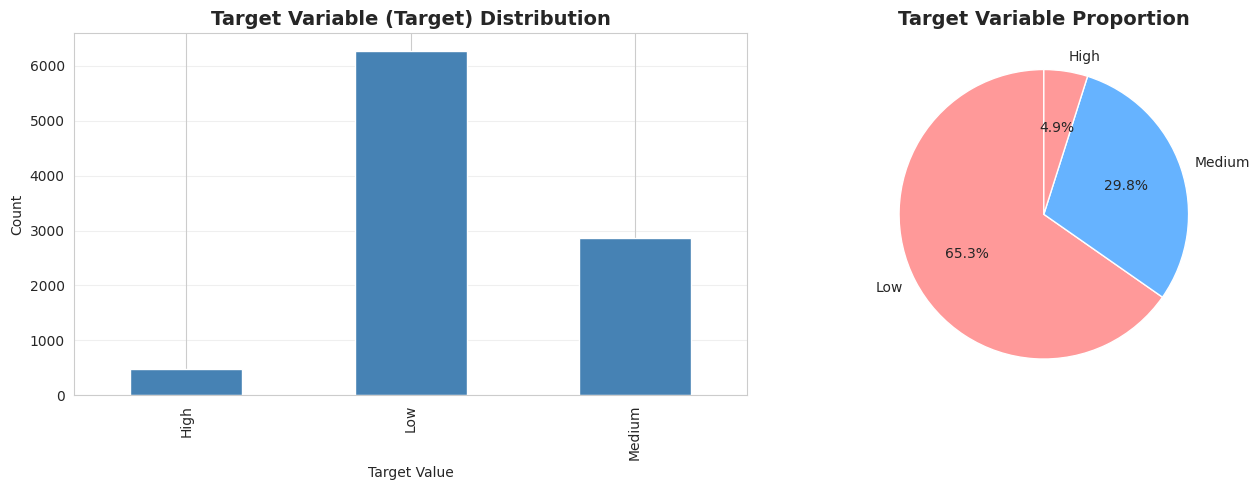


⚠ Class imbalance detected! Ratio: 13.36:1


In [94]:

# ========================================
# 2. TARGET VARIABLE ANALYSIS (Target)
# ========================================

print("\n" + "=" * 60)
print("TARGET VARIABLE ANALYSIS")
print("=" * 60)

if 'Target' in train_df.columns:
    print("\nTarget Distribution:")
    print(train_df['Target'].value_counts().sort_index())
    print(f"\nTarget Proportions:")
    print(train_df['Target'].value_counts(normalize=True).sort_index())

    # Visualize target distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    # Count plot
    train_df['Target'].value_counts().sort_index().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Target Variable (Target) Distribution', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Target Value')
    axes[0].set_ylabel('Count')
    axes[0].grid(axis='y', alpha=0.3)

    # Pie chart
    target_counts = train_df['Target'].value_counts()
    axes[1].pie(target_counts, labels=target_counts.index, autopct='%1.1f%%',
                startangle=90, colors=['#ff9999', '#66b3ff'])
    axes[1].set_title('Target Variable Proportion', fontsize=14, fontweight='bold')

    plt.tight_layout()
    plt.show()

    # Check for class imbalance
    class_ratio = train_df['Target'].value_counts().max() / train_df['Target'].value_counts().min()
    if class_ratio > 1.5:
        print(f"\n⚠ Class imbalance detected! Ratio: {class_ratio:.2f}:1")
    else:
        print(f"\n✓ Classes are relatively balanced. Ratio: {class_ratio:.2f}:1")


In [95]:
# ========================================
# 3. BASIC INFORMATION
# ========================================

print("\n" + "=" * 60)
print("BASIC DATASET INFORMATION")
print("=" * 60)

print("\n--- TRAIN SET INFO ---")
print(train_df.info())

print("\n--- TEST SET INFO ---")
print(test_df.info())


BASIC DATASET INFORMATION

--- TRAIN SET INFO ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 39 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                9618 non-null   object 
 1   country                                                           9618 non-null   object 
 2   owner_age                                                         9618 non-null   float64
 3   attitude_stable_business_environment                              9616 non-null   object 
 4   attitude_worried_shutdown                                         9616 non-null   object 
 5   compliance_income_tax                                             9614 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          9613 non-nu


MISSING VALUES ANALYSIS

TRAIN SET - Columns with Missing Values:
                                                          Column  Missing_Count  Percentage
                                            uses_informal_lender           4489   46.672905
                                     uses_friends_family_savings           4488   46.662508
                                      motivation_make_more_money           4291   44.614265
                                               funeral_insurance           4188   43.543356
                                               medical_insurance           4188   43.543356
                                             business_age_months           4111   42.742774
                                         future_risk_theft_stock           4100   42.628405
                                                  has_debit_card           4003   41.619879
                                            has_internet_banking           4003   41.619879
             

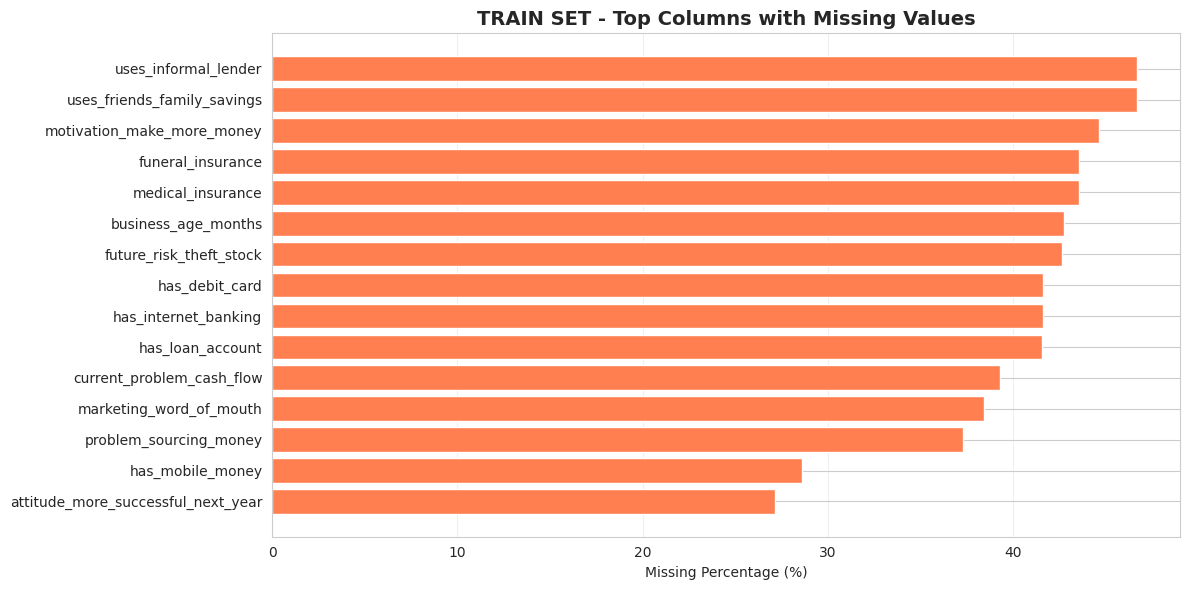


TEST SET - Columns with Missing Values:
                                                          Column  Missing_Count  Percentage
                                     uses_friends_family_savings           1131   47.027027
                                            uses_informal_lender           1131   47.027027
                                      motivation_make_more_money           1084   45.072765
                                               funeral_insurance           1042   43.326403
                                               medical_insurance           1042   43.326403
                                             business_age_months           1033   42.952183
                                         future_risk_theft_stock           1017   42.286902
                                                  has_debit_card            992   41.247401
                                                has_loan_account            992   41.247401
                                       

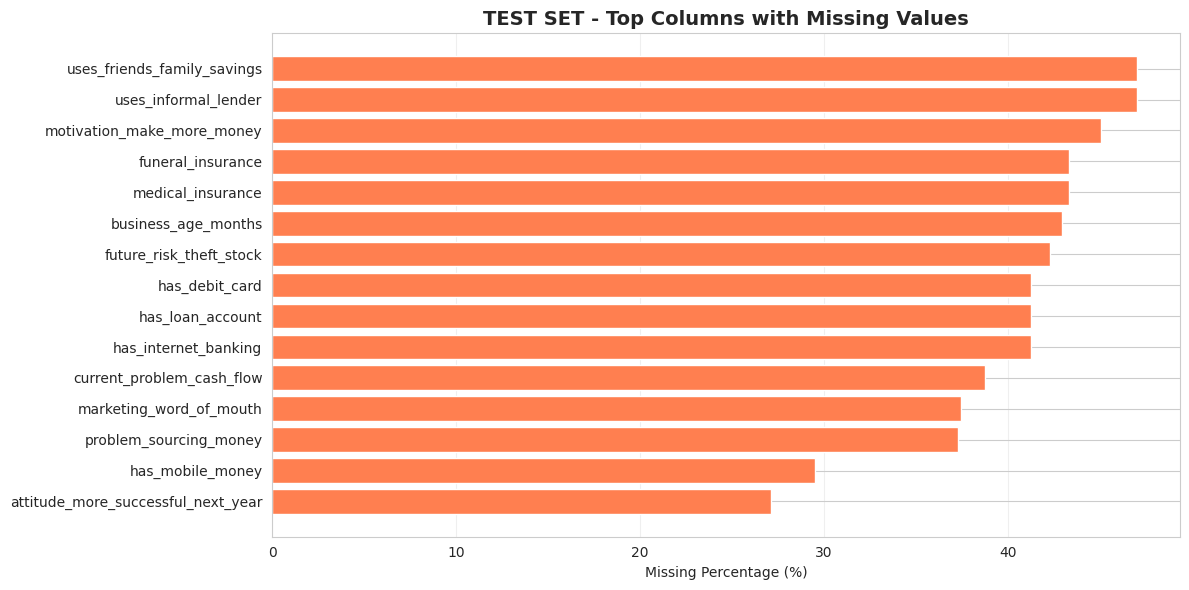

In [96]:
# ========================================
# 4. MISSING VALUES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("MISSING VALUES ANALYSIS")
print("=" * 60)

def analyze_missing(df, name):
    missing = df.isnull().sum()
    missing_pct = (missing / len(df)) * 100
    missing_df = pd.DataFrame({
        'Column': missing.index,
        'Missing_Count': missing.values,
        'Percentage': missing_pct.values
    }).query('Missing_Count > 0').sort_values('Percentage', ascending=False)

    print(f"\n{name} - Columns with Missing Values:")
    if len(missing_df) > 0:
        print(missing_df.to_string(index=False))

        # Visualize top missing columns
        if len(missing_df) > 0:
            top_missing = missing_df.head(15)
            plt.figure(figsize=(12, 6))
            plt.barh(top_missing['Column'], top_missing['Percentage'], color='coral')
            plt.xlabel('Missing Percentage (%)')
            plt.title(f'{name} - Top Columns with Missing Values', fontsize=14, fontweight='bold')
            plt.gca().invert_yaxis()
            plt.grid(axis='x', alpha=0.3)
            plt.tight_layout()
            plt.show()
    else:
        print("No missing values found!")

    return missing_df

train_missing = analyze_missing(train_df, "TRAIN SET")
test_missing = analyze_missing(test_df, "TEST SET")


NUMERICAL FEATURES ANALYSIS

Numerical Features (6):
['owner_age', 'personal_income', 'business_expenses', 'business_turnover', 'business_age_years', 'business_age_months']

Statistical Summary:
         owner_age  personal_income  business_expenses  business_turnover  \
count  9618.000000     9.509000e+03       9.389000e+03       9.402000e+03   
mean     41.705344     2.627345e+05       4.583838e+05       1.348210e+06   
std      13.314010     2.566268e+06       6.184746e+06       8.804741e+06   
min      18.000000     0.000000e+00       0.000000e+00       0.000000e+00   
25%      32.000000     3.000000e+02       7.000000e+02       1.500000e+03   
50%      40.000000     2.000000e+03       3.000000e+03       6.000000e+03   
75%      50.000000     2.500000e+04       2.500000e+04       5.000000e+04   
max     103.000000     1.500000e+08       5.000000e+08       4.200000e+08   

       business_age_years  business_age_months  
count         9366.000000          5507.000000  
mean        

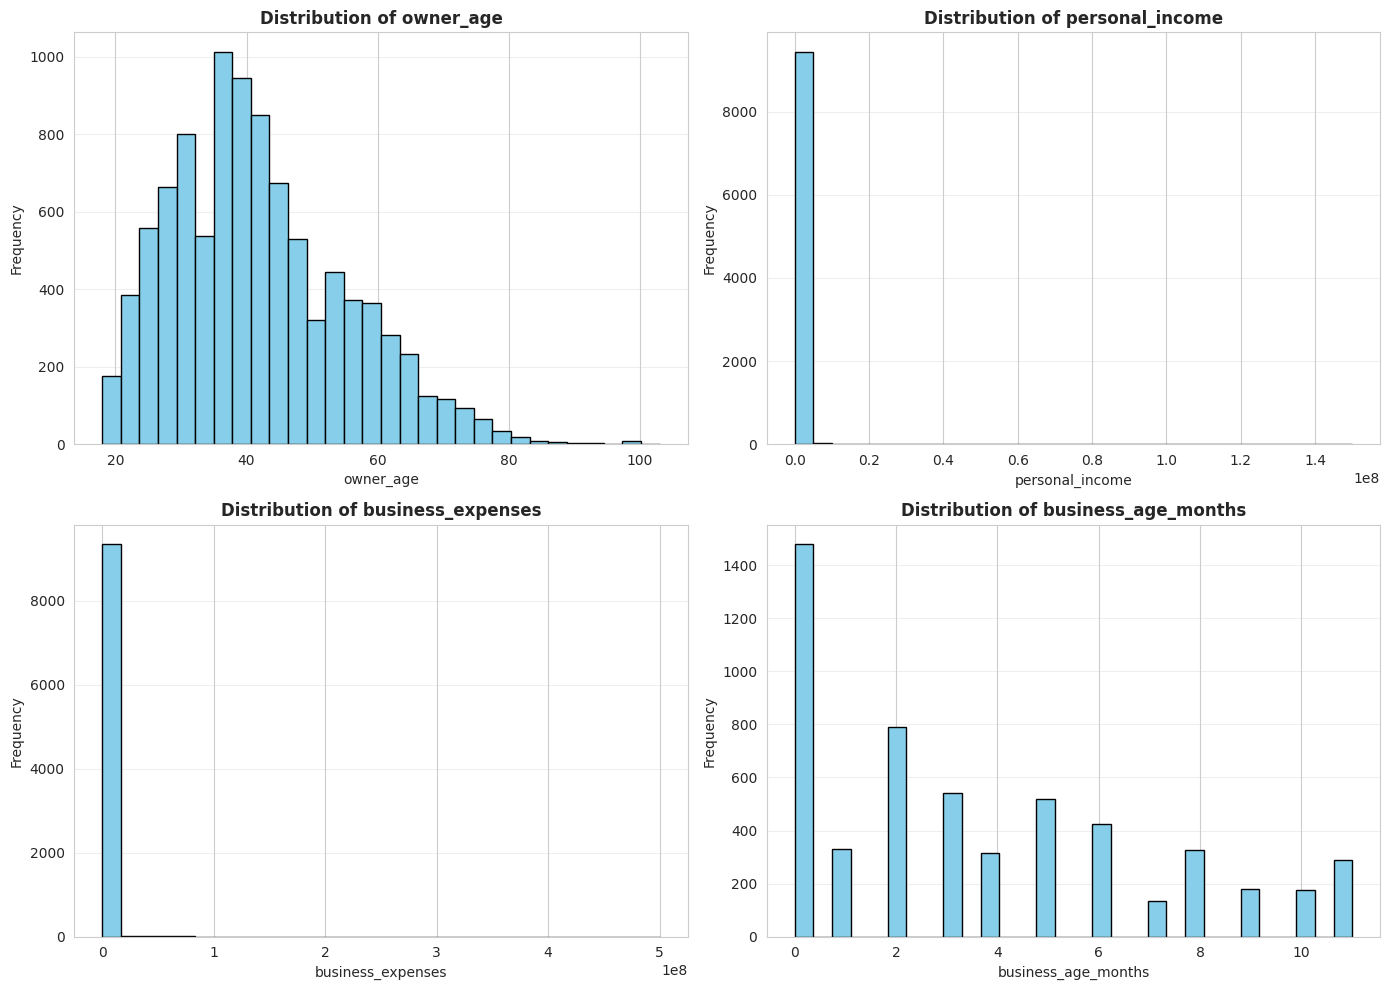

In [97]:
#========================================
# 5. NUMERICAL FEATURES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("NUMERICAL FEATURES ANALYSIS")
print("=" * 60)

# Identify numerical columns
numerical_cols = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
if 'Target' in numerical_cols:
    numerical_cols.remove('Target')

print(f"\nNumerical Features ({len(numerical_cols)}):")
print(numerical_cols)

# Statistical summary
print("\nStatistical Summary:")
print(train_df[numerical_cols].describe())

# Visualize distributions of key numerical features
key_numerical = ['owner_age', 'personal_income', 'business_expenses', 'business_age_months']
available_numerical = [col for col in key_numerical if col in train_df.columns]

if available_numerical:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    axes = axes.ravel()

    for idx, col in enumerate(available_numerical[:4]):
        train_df[col].hist(bins=30, ax=axes[idx], color='skyblue', edgecolor='black')
        axes[idx].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
        axes[idx].set_xlabel(col)
        axes[idx].set_ylabel('Frequency')
        axes[idx].grid(axis='y', alpha=0.3)

    plt.tight_layout()
    plt.show()

In [98]:
#========================================
#6. CATEGORICAL FEATURES ANALYSIS
# ========================================

print("\n" + "=" * 60)
print("CATEGORICAL FEATURES ANALYSIS")
print("=" * 60)

# Identify categorical columns
categorical_cols = train_df.select_dtypes(include=['object']).columns.tolist()
if 'ID' in categorical_cols:
    categorical_cols.remove('ID')

print(f"\nCategorical Features ({len(categorical_cols)}):")
print(categorical_cols)

# Cardinality analysis
print("\nCardinality (Unique Values) for Categorical Features:")
cardinality_df = pd.DataFrame({
    'Feature': categorical_cols,
    'Unique_Values': [train_df[col].nunique() for col in categorical_cols]
}).sort_values('Unique_Values', ascending=False)
print(cardinality_df.to_string(index=False))


CATEGORICAL FEATURES ANALYSIS

Categorical Features (32):
['country', 'attitude_stable_business_environment', 'attitude_worried_shutdown', 'compliance_income_tax', 'perception_insurance_doesnt_cover_losses', 'perception_cannot_afford_insurance', 'motor_vehicle_insurance', 'has_mobile_money', 'current_problem_cash_flow', 'has_cellphone', 'owner_sex', 'offers_credit_to_customers', 'attitude_satisfied_with_achievement', 'has_credit_card', 'keeps_financial_records', 'perception_insurance_companies_dont_insure_businesses_like_yours', 'perception_insurance_important', 'has_insurance', 'covid_essential_service', 'attitude_more_successful_next_year', 'problem_sourcing_money', 'marketing_word_of_mouth', 'has_loan_account', 'has_internet_banking', 'has_debit_card', 'future_risk_theft_stock', 'medical_insurance', 'funeral_insurance', 'motivation_make_more_money', 'uses_friends_family_savings', 'uses_informal_lender', 'Target']

Cardinality (Unique Values) for Categorical Features:
              


COUNTRY DISTRIBUTION

Train Set Country Distribution:
country
eswatini    2674
zimbabwe    2612
malawi      2388
lesotho     1944
Name: count, dtype: int64

Test Set Country Distribution:
country
eswatini    669
zimbabwe    653
malawi      597
lesotho     486
Name: count, dtype: int64


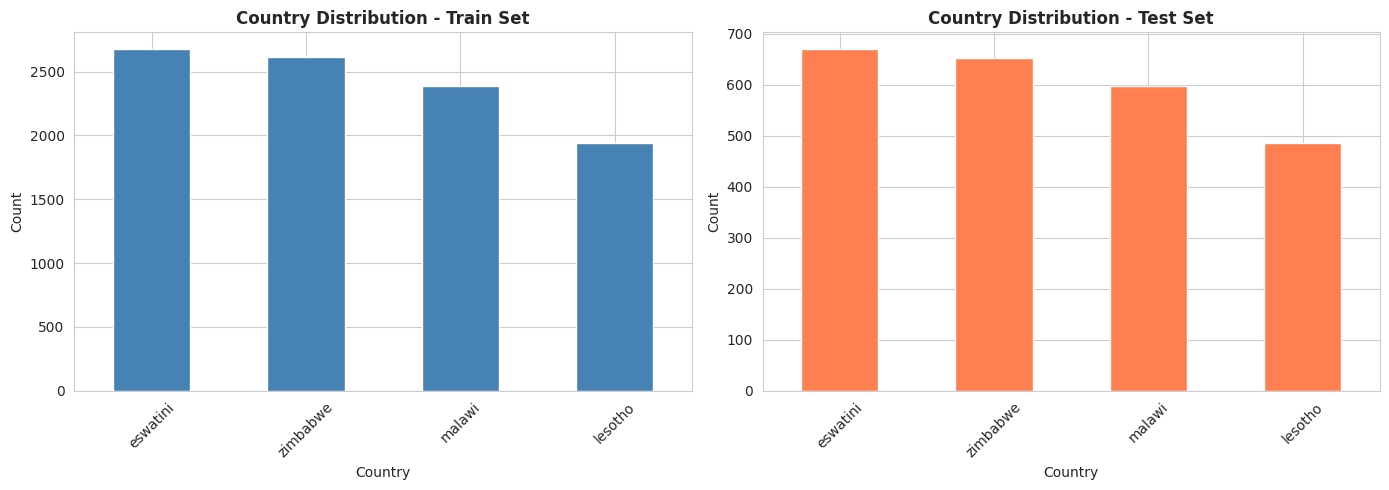

In [99]:
# ========================================
# 7. COUNTRY DISTRIBUTION
# ========================================

print("\n" + "=" * 60)
print("COUNTRY DISTRIBUTION")
print("=" * 60)

if 'country' in train_df.columns:
    print("\nTrain Set Country Distribution:")
    print(train_df['country'].value_counts())

    print("\nTest Set Country Distribution:")
    print(test_df['country'].value_counts())

    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))

    train_df['country'].value_counts().plot(kind='bar', ax=axes[0], color='steelblue')
    axes[0].set_title('Country Distribution - Train Set', fontsize=12, fontweight='bold')
    axes[0].set_xlabel('Country')
    axes[0].set_ylabel('Count')
    axes[0].tick_params(axis='x', rotation=45)

    test_df['country'].value_counts().plot(kind='bar', ax=axes[1], color='coral')
    axes[1].set_title('Country Distribution - Test Set', fontsize=12, fontweight='bold')
    axes[1].set_xlabel('Country')
    axes[1].set_ylabel('Count')
    axes[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

In [100]:
# ========================================
# 8. BINARY/CATEGORICAL FEATURE PATTERNS
# ========================================

print("\n" + "=" * 60)
print("BINARY & CATEGORICAL PATTERNS")
print("=" * 60)

# Analyze Yes/No columns
yes_no_cols = [col for col in categorical_cols if
            train_df[col].dropna().isin(['Yes', 'No', "Don't know or N/A"]).any()]

print(f"\nYes/No Type Columns ({len(yes_no_cols)}):")
for col in yes_no_cols[:5]:  # Show first 5
    print(f"\n{col}:")
    print(train_df[col].value_counts())


BINARY & CATEGORICAL PATTERNS

Yes/No Type Columns (19):

attitude_stable_business_environment:
attitude_stable_business_environment
Yes           5820
No            2451
Don’t know    1345
Name: count, dtype: int64

attitude_worried_shutdown:
attitude_worried_shutdown
No            5804
Yes           3575
Don’t know     237
Name: count, dtype: int64

compliance_income_tax:
compliance_income_tax
No            8010
Yes           1252
Don’t know     341
Refused         11
Name: count, dtype: int64

perception_insurance_doesnt_cover_losses:
perception_insurance_doesnt_cover_losses
No            4486
Yes           2604
Don't know    2523
Name: count, dtype: int64

perception_cannot_afford_insurance:
perception_cannot_afford_insurance
Yes           6056
No            2093
Don't know    1464
Name: count, dtype: int64


In [101]:
# ========================================
# 9. FEATURE RELATIONSHIPS WITH TARGET
# ========================================

if 'Target' in train_df.columns:
    print("\n" + "=" * 60)
    print("FEATURE RELATIONSHIPS WITH TARGET")
    print("=" * 60)

    # Numerical features vs target
    print("\nNumerical Features by Target:")
    if available_numerical:
        for col in available_numerical[:3]:  # Top 3
            print(f"\n{col} by Target:")
            grouped_stats = train_df.groupby('Target')[col].agg(['mean', 'median', 'std', 'count'])
            print(grouped_stats)

    # Categorical features vs target
    print("\nKey Categorical Features by Target:")
    key_cat = ['country', 'compliance_income_tax', 'medical_insurance']
    for col in key_cat:
        if col in train_df.columns:
            print(f"\n{col} distribution by Target:")
            ct = pd.crosstab(train_df[col], train_df['Target'], normalize='index') * 100
            print(ct.round(2))


FEATURE RELATIONSHIPS WITH TARGET

Numerical Features by Target:

owner_age by Target:
             mean  median        std  count
Target                                     
High    44.610638    42.0  11.881589    470
Low     40.732962    39.0  13.333695   6280
Medium  43.358438    42.0  13.264731   2868

personal_income by Target:
                 mean  median           std  count
Target                                            
High    882802.239224  5000.0  4.715191e+06    464
Low     254094.823039  2000.0  2.546815e+06   6209
Medium  180199.970205  1500.0  2.045196e+06   2836

business_expenses by Target:
                mean   median           std  count
Target                                            
High    1.062801e+06  10100.0  8.584024e+06    464
Low     4.855686e+05   3000.0  6.866861e+06   6137
Medium  2.979526e+05   2000.0  3.564138e+06   2788

Key Categorical Features by Target:

country distribution by Target:
Target     High    Low  Medium
country                

In [102]:
# ========================================
# 10. DATA QUALITY CHECKS
# ========================================

print("\n" + "=" * 60)
print("DATA QUALITY CHECKS")
print("=" * 60)

# Check for duplicate IDs
print(f"\nDuplicate IDs in Train: {train_df['ID'].duplicated().sum()}")
print(f"Duplicate IDs in Test: {test_df['ID'].duplicated().sum()}")

# Check for ID overlap
id_overlap = set(train_df['ID']).intersection(set(test_df['ID']))
print(f"Overlapping IDs between Train and Test: {len(id_overlap)}")

# Check feature consistency
train_cols = set(train_df.columns) - {'FHI'}
test_cols = set(test_df.columns)
missing_in_test = train_cols - test_cols
extra_in_test = test_cols - train_cols

if missing_in_test:
    print(f"\n⚠ Features in Train but not in Test: {missing_in_test}")
if extra_in_test:
    print(f"\n⚠ Features in Test but not in Train: {extra_in_test}")
if not missing_in_test and not extra_in_test:
    print("\n✓ Feature sets are consistent (except target variable)")


DATA QUALITY CHECKS

Duplicate IDs in Train: 0
Duplicate IDs in Test: 0
Overlapping IDs between Train and Test: 0

⚠ Features in Train but not in Test: {'Target'}


In [103]:
# ========================================
# 11. KEY INSIGHTS SUMMARY
# ========================================

print("\n" + "=" * 60)
print("KEY INSIGHTS & RECOMMENDATIONS")
print("=" * 60)

print("\n📊 EDA SUMMARY:")
print(f"• Total training samples: {len(train_df):,}")
print(f"• Total test samples: {len(test_df):,}")
print(f"• Number of features: {len(categorical_cols) + len(numerical_cols)}")
print(f"• Numerical features: {len(numerical_cols)}")
print(f"• Categorical features: {len(categorical_cols)}")

if len(train_missing) > 0:
    print(f"\n⚠ Missing Data:")
    print(f"• Features with missing values: {len(train_missing)}")
    print(f"• Highest missing percentage: {train_missing['Percentage'].max():.1f}%")

print("\n💡 NEXT STEPS:")
print("1. Handle missing values (imputation or feature engineering)")
print("2. Encode categorical variables (Label/One-Hot encoding)")
print("3. Scale numerical features if needed")
print("4. Consider feature engineering based on domain knowledge")
print("5. Handle class imbalance if present")
print("6. Train baseline models and iterate")

print("\n" + "=" * 60)
print("EDA COMPLETE!")
print("=" * 60)


KEY INSIGHTS & RECOMMENDATIONS

📊 EDA SUMMARY:
• Total training samples: 9,618
• Total test samples: 2,405
• Number of features: 38
• Numerical features: 6
• Categorical features: 32

⚠ Missing Data:
• Features with missing values: 35
• Highest missing percentage: 46.7%

💡 NEXT STEPS:
1. Handle missing values (imputation or feature engineering)
2. Encode categorical variables (Label/One-Hot encoding)
3. Scale numerical features if needed
4. Consider feature engineering based on domain knowledge
5. Handle class imbalance if present
6. Train baseline models and iterate

EDA COMPLETE!


In [104]:
train_df.isnull().sum()

ID                                                                     0
country                                                                0
owner_age                                                              0
attitude_stable_business_environment                                   2
attitude_worried_shutdown                                              2
compliance_income_tax                                                  4
perception_insurance_doesnt_cover_losses                               5
perception_cannot_afford_insurance                                     5
personal_income                                                      109
business_expenses                                                    229
business_turnover                                                    216
business_age_years                                                   252
motor_vehicle_insurance                                             2244
has_mobile_money                                                    2751
current_problem_cash_flow                                           3778
has_cellphone                                                       1944
owner_sex                                                           1944
offers_credit_to_customers                                          1946
attitude_satisfied_with_achievement                                 1946
has_credit_card                                                     1947
keeps_financial_records                                             1949
perception_insurance_companies_dont_insure_businesses_like_yours    1948
perception_insurance_important                                      1955
has_insurance                                                       1956
covid_essential_service                                             2390
attitude_more_successful_next_year                                  2612
problem_sourcing_money                                              3587
marketing_word_of_mouth                                             3695
has_loan_account                                                    3999
has_internet_banking                                                4003
has_debit_card                                                      4003
future_risk_theft_stock                                             4100
business_age_months                                                 4111
medical_insurance                                                   4188
funeral_insurance                                                   4188
motivation_make_more_money                                          4291
uses_friends_family_savings                                         4488
uses_informal_lender                                                4489
Target                                                                 0
dtype: int64

In [105]:
test_df.isnull().sum()

ID                                                                     0
country                                                                0
owner_age                                                              1
attitude_stable_business_environment                                   0
attitude_worried_shutdown                                              0
compliance_income_tax                                                  0
perception_insurance_doesnt_cover_losses                               2
perception_cannot_afford_insurance                                     2
personal_income                                                       23
business_expenses                                                     70
business_turnover                                                     70
business_age_years                                                    59
motor_vehicle_insurance                                              557
has_mobile_money                                                     710
current_problem_cash_flow                                            932
has_cellphone                                                        486
owner_sex                                                            486
offers_credit_to_customers                                           486
attitude_satisfied_with_achievement                                  486
has_credit_card                                                      486
keeps_financial_records                                              486
perception_insurance_companies_dont_insure_businesses_like_yours     488
perception_insurance_important                                       488
has_insurance                                                        488
covid_essential_service                                              597
attitude_more_successful_next_year                                   653
problem_sourcing_money                                               897
marketing_word_of_mouth                                              901
has_loan_account                                                     992
has_internet_banking                                                 992
has_debit_card                                                       992
future_risk_theft_stock                                             1017
business_age_months                                                 1033
medical_insurance                                                   1042
funeral_insurance                                                   1042
motivation_make_more_money                                          1084
uses_friends_family_savings                                         1131
uses_informal_lender                                                1131
dtype: int64

In [106]:

# ===============================
# 1. NUMERIC COLUMNS
# ===============================
numerical_cols = [
    'owner_age',
    'personal_income',
    'business_expenses',
    'business_turnover',
    'business_age_years',
    'business_age_months'
]

for col in numerical_cols:
    # Convert to numeric
    train_df[col] = pd.to_numeric(train_df[col], errors='coerce')
    test_df[col] = pd.to_numeric(test_df[col], errors='coerce')

    # Median from TRAIN only
    median_value = train_df[col].median()

    # Fill missing
    train_df[col] = train_df[col].fillna(median_value)
    test_df[col] = test_df[col].fillna(median_value)










In [107]:
# ===============================
# 2. CATEGORICAL COLUMNS
# ===============================
categorical_cols = [
    'country',
    'attitude_stable_business_environment',
    'attitude_worried_shutdown',
    'compliance_income_tax',
    'perception_insurance_doesnt_cover_losses',
    'perception_cannot_afford_insurance',
    'motor_vehicle_insurance',
    'has_mobile_money',
    'current_problem_cash_flow',
    'has_cellphone',
    'owner_sex',
    'offers_credit_to_customers',
    'attitude_satisfied_with_achievement',
    'has_credit_card',
    'keeps_financial_records',
    'perception_insurance_companies_dont_insure_businesses_like_yours',
    'perception_insurance_important',
    'has_insurance',
    'covid_essential_service',
    'attitude_more_successful_next_year',
    'problem_sourcing_money',
    'marketing_word_of_mouth',
    'has_loan_account',
    'has_internet_banking',
    'has_debit_card',
    'future_risk_theft_stock',
    'medical_insurance',
    'funeral_insurance',
    'motivation_make_more_money',
    'uses_friends_family_savings',
    'uses_informal_lender'
]

# ===============================
# 3. FILL CATEGORICAL MISSING (MODE)
# ===============================
for col in categorical_cols:
    mode_value = train_df[col].mode(dropna=True)[0]

    train_df[col] = train_df[col].fillna(mode_value)
    test_df[col] = test_df[col].fillna(mode_value)





In [108]:
train_df.isnull().sum()

ID                                                                  0
country                                                             0
owner_age                                                           0
attitude_stable_business_environment                                0
attitude_worried_shutdown                                           0
compliance_income_tax                                               0
perception_insurance_doesnt_cover_losses                            0
perception_cannot_afford_insurance                                  0
personal_income                                                     0
business_expenses                                                   0
business_turnover                                                   0
business_age_years                                                  0
motor_vehicle_insurance                                             0
has_mobile_money                                                    0
current_problem_cash_flow                                           0
has_cellphone                                                       0
owner_sex                                                           0
offers_credit_to_customers                                          0
attitude_satisfied_with_achievement                                 0
has_credit_card                                                     0
keeps_financial_records                                             0
perception_insurance_companies_dont_insure_businesses_like_yours    0
perception_insurance_important                                      0
has_insurance                                                       0
covid_essential_service                                             0
attitude_more_successful_next_year                                  0
problem_sourcing_money                                              0
marketing_word_of_mouth                                             0
has_loan_account                                                    0
has_internet_banking                                                0
has_debit_card                                                      0
future_risk_theft_stock                                             0
business_age_months                                                 0
medical_insurance                                                   0
funeral_insurance                                                   0
motivation_make_more_money                                          0
uses_friends_family_savings                                         0
uses_informal_lender                                                0
Target                                                              0
dtype: int64

In [109]:
test_df.isnull().sum()

ID                                                                  0
country                                                             0
owner_age                                                           0
attitude_stable_business_environment                                0
attitude_worried_shutdown                                           0
compliance_income_tax                                               0
perception_insurance_doesnt_cover_losses                            0
perception_cannot_afford_insurance                                  0
personal_income                                                     0
business_expenses                                                   0
business_turnover                                                   0
business_age_years                                                  0
motor_vehicle_insurance                                             0
has_mobile_money                                                    0
current_problem_cash_flow                                           0
has_cellphone                                                       0
owner_sex                                                           0
offers_credit_to_customers                                          0
attitude_satisfied_with_achievement                                 0
has_credit_card                                                     0
keeps_financial_records                                             0
perception_insurance_companies_dont_insure_businesses_like_yours    0
perception_insurance_important                                      0
has_insurance                                                       0
covid_essential_service                                             0
attitude_more_successful_next_year                                  0
problem_sourcing_money                                              0
marketing_word_of_mouth                                             0
has_loan_account                                                    0
has_internet_banking                                                0
has_debit_card                                                      0
future_risk_theft_stock                                             0
business_age_months                                                 0
medical_insurance                                                   0
funeral_insurance                                                   0
motivation_make_more_money                                          0
uses_friends_family_savings                                         0
uses_informal_lender                                                0
dtype: int64

In [110]:
train_df

ID   country  owner_age attitude_stable_business_environment  \
0     ID_3CFL0U  eswatini       63.0                                  Yes   
1     ID_XWI7G3  zimbabwe       39.0                                   No   
2     ID_TY93LV    malawi       34.0                           Don’t know   
3     ID_9OP2C8    malawi       28.0                                  Yes   
4     ID_13REYS  zimbabwe       43.0                                  Yes   
...         ...       ...        ...                                  ...   
9613  ID_D7NC2D   lesotho       31.0                                  Yes   
9614  ID_NT06RL    malawi       64.0                           Don’t know   
9615  ID_4TVWA3  zimbabwe       43.0                                  Yes   
9616  ID_3U3S2Z  zimbabwe       38.0                                  Yes   
9617  ID_4XGOHM  zimbabwe       38.0                                  Yes   

     attitude_worried_shutdown compliance_income_tax  \
0                           No                    No   
1                          Yes                   Yes   
2                           No                    No   
3                           No                    No   
4                           No                    No   
...                        ...                   ...   
9613                        No                    No   
9614                Don’t know                   Yes   
9615                        No                    No   
9616                       Yes                    No   
9617                       Yes                    No   

     perception_insurance_doesnt_cover_losses  \
0                                          No   
1                                          No   
2                                  Don't know   
3                                          No   
4                                         Yes   
...                                       ...   
9613                               Don't know   
9614                                       No   
9615                                      Yes   
9616                                       No   
9617                               Don't know   

     perception_cannot_afford_insurance  personal_income  business_expenses  \
0                                   Yes           3000.0             6000.0   
1                                   Yes           2000.0             3000.0   
2                                   Yes          30000.0             6000.0   
3                                    No         180000.0            60000.0   
4                                   Yes             50.0             2400.0   
...                                 ...              ...                ...   
9613                         Don't know           2000.0              800.0   
9614                                 No       10000000.0          5000000.0   
9615                                 No            450.0             3000.0   
9616                                Yes           2000.0             3000.0   
9617                         Don't know            600.0             1200.0   

      ...  has_internet_banking  has_debit_card future_risk_theft_stock  \
0     ...             Never had       Never had                      No   
1     ...             Never had       Never had                      No   
2     ...             Never had       Never had                     Yes   
3     ...             Never had       Never had                      No   
4     ...             Never had       Never had                      No   
...   ...                   ...             ...                     ...   
9613  ...             Never had       Never had                      No   
9614  ...             Never had        Have now                     Yes   
9615  ...             Never had       Never had                      No   
9616  ...             Never had       Never had                      No   
9617  ...             Never had       Never had     

In [111]:
test_df

ID   country  owner_age attitude_stable_business_environment  \
0     ID_5EGLKX  zimbabwe       50.0                                   No   
1     ID_4AI7RE   lesotho       36.0                                  Yes   
2     ID_V9OB3M   lesotho       25.0                           Don’t know   
3     ID_6OI9DI    malawi       25.0                           Don’t know   
4     ID_H2TN8B   lesotho       47.0                                   No   
...         ...       ...        ...                                  ...   
2400  ID_FX7XJZ  eswatini       29.0                                  Yes   
2401  ID_XAL1LX    malawi       20.0                           Don’t know   
2402  ID_UHBP0F  zimbabwe       26.0                                  Yes   
2403  ID_GKIKR2  eswatini       63.0                                   No   
2404  ID_O7P4HI  zimbabwe       25.0                                  Yes   

     attitude_worried_shutdown compliance_income_tax  \
0                           No                    No   
1                          Yes                    No   
2                           No                    No   
3                          Yes                    No   
4                          Yes                    No   
...                        ...                   ...   
2400                       Yes                    No   
2401                Don’t know                    No   
2402                       Yes                    No   
2403                        No                   Yes   
2404                        No                    No   

     perception_insurance_doesnt_cover_losses  \
0                                          No   
1                                         Yes   
2                                  Don't know   
3                                          No   
4                                  Don't know   
...                                       ...   
2400                                       No   
2401                               Don't know   
2402                                      Yes   
2403                                      Yes   
2404                                       No   

     perception_cannot_afford_insurance  personal_income  business_expenses  \
0                                   Yes            100.0             3600.0   
1                                   Yes            900.0              400.0   
2                            Don't know           5250.0              350.0   
3                                   Yes         485000.0            10000.0   
4                            Don't know             97.0              500.0   
...                                 ...              ...                ...   
2400                                Yes            600.0             1700.0   
2401                         Don't know          30000.0            20000.0   
2402                                Yes           3888.0             3000.0   
2403                                Yes           3500.0             1700.0   
2404                                Yes            150.0             1800.0   

      ...                 has_loan_account  has_internet_banking  \
0     ...                        Never had             Never had   
1     ...                        Never had             Never had   
2     ...  Used to have but don't have now              Have now   
3     ...                        Never had             Never had   
4     ...  Used to have but don't have now              Have now   
...   ...                              ...                   ...   
2400  ...                        Never had             Never had   
2401  ...                        Never had             Never had   
2402  ...                        Never had             Never had   
2403  ...                        Never had             Never had   
2404  ...                        Never had             Never had   

     has_debit_card future_risk_theft_stock business_age_mon

In [112]:
# ===============================
# 5. FINAL SANITY CHECK
# ===============================
print("\nMissing values in TRAIN:")
print(train_df.isnull().sum().sort_values(ascending=False))

print("\nMissing values in TEST:")
print(test_df.isnull().sum().sort_values(ascending=False))

print("\nTrain shape:", train_df.shape)
print("Test shape:", test_df.shape)


Missing values in TRAIN:
ID                                                                  0
country                                                             0
owner_age                                                           0
attitude_stable_business_environment                                0
attitude_worried_shutdown                                           0
compliance_income_tax                                               0
perception_insurance_doesnt_cover_losses                            0
perception_cannot_afford_insurance                                  0
personal_income                                                     0
business_expenses                                                   0
business_turnover                                                   0
business_age_years                                                  0
motor_vehicle_insurance                                             0
has_mobile_money                                                

In [113]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 39 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                9618 non-null   object 
 1   country                                                           9618 non-null   object 
 2   owner_age                                                         9618 non-null   float64
 3   attitude_stable_business_environment                              9618 non-null   object 
 4   attitude_worried_shutdown                                         9618 non-null   object 
 5   compliance_income_tax                                             9618 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          9618 non-null   object 
 7   perception_cannot_afford_insuranc

In [114]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 38 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                2405 non-null   object 
 1   country                                                           2405 non-null   object 
 2   owner_age                                                         2405 non-null   float64
 3   attitude_stable_business_environment                              2405 non-null   object 
 4   attitude_worried_shutdown                                         2405 non-null   object 
 5   compliance_income_tax                                             2405 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          2405 non-null   object 
 7   perception_cannot_afford_insuranc

In [117]:
# List of categorical columns train
categorical_columns = [
    'attitude_stable_business_environment',
    'attitude_worried_shutdown',
    'compliance_income_tax',
    'perception_insurance_doesnt_cover_losses',
    'perception_cannot_afford_insurance',
    'current_problem_cash_flow',
    'attitude_satisfied_with_achievement',
    'perception_insurance_important',
    'covid_essential_service',
    'perception_insurance_companies_dont_insure_businesses_like_yours',
    'attitude_more_successful_next_year',
    'problem_sourcing_money',
    'marketing_word_of_mouth',
    'motor_vehicle_insurance',
    'has_mobile_money',
    'has_cellphone',
    'owner_sex',
    'offers_credit_to_customers',
    'has_credit_card',
    'keeps_financial_records',
    'has_insurance',
    'has_loan_account',
    'has_debit_card',
    'future_risk_theft_stock',
    'offers_credit_to_customers',
    'has_credit_card',
    'future_risk_theft_stock',
    'medical_insurance',
    'funeral_insurance',
    'motivation_make_more_money',
    'uses_friends_family_savings',
    'uses_informal_lender',
    'has_internet_banking'
]

# List of numeric columns Train
numeric_columns = [
    'business_age_months',
    'personal_income',
    'business_expenses',
    'business_turnover',
    'business_age_years',
    'owner_age'
]

# Function to fill categorical columns Train
def fill_categorical_by_country_mode(train_df, column):
    # Fill NaNs by country mode
    train_df[column] = train_df.groupby('country')[column].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )
    # Fill any remaining NaNs with global mode Train
    global_mode = train_df[column].mode().iloc[0] if not train_df[column].mode().empty else np.nan
    train_df[column] = train_df[column].fillna(global_mode)
    return train_df

# Fill all categorical columns Train
for col in categorical_columns:
    fill_categorical_by_country_mode(train_df, col)

# Function to fill numeric columns Train
def fill_numeric_by_country_median(df, column):
    # Fill NaNs by country median
    df[column] = df.groupby('country')[column].transform(lambda x: x.fillna(x.median()))
    # Fill remaining NaNs with global median Train
    df[column] = df[column].fillna(df[column].median())
    return df

# Fill all numeric columns Train
for col in numeric_columns:
    fill_numeric_by_country_median(train_df, col)

# Final check: print number of NaNs remaining per column
print("Remaining NaNs in categorical columns:")
print(train_df[categorical_columns].isnull().sum())

print("\nRemaining NaNs in numeric columns:")
print(train_df[numeric_columns].isnull().sum())

# Optional: Check NaNs per country for any column (example: business_age_months)
nan_by_country = train_df.groupby('country')['business_age_months'].apply(lambda x: x.isnull().sum())
print("\nNaNs per country in 'business_age_months':")
print(nan_by_country)

train_df.isnull().sum()


Remaining NaNs in categorical columns:
attitude_stable_business_environment                                0
attitude_worried_shutdown                                           0
compliance_income_tax                                               0
perception_insurance_doesnt_cover_losses                            0
perception_cannot_afford_insurance                                  0
current_problem_cash_flow                                           0
attitude_satisfied_with_achievement                                 0
perception_insurance_important                                      0
covid_essential_service                                             0
perception_insurance_companies_dont_insure_businesses_like_yours    0
attitude_more_successful_next_year                                  0
problem_sourcing_money                                              0
marketing_word_of_mouth                                             0
motor_vehicle_insurance                            

ID                                                                  0
country                                                             0
owner_age                                                           0
attitude_stable_business_environment                                0
attitude_worried_shutdown                                           0
compliance_income_tax                                               0
perception_insurance_doesnt_cover_losses                            0
perception_cannot_afford_insurance                                  0
personal_income                                                     0
business_expenses                                                   0
business_turnover                                                   0
business_age_years                                                  0
motor_vehicle_insurance                                             0
has_mobile_money                                                    0
current_problem_cash_flow                                           0
has_cellphone                                                       0
owner_sex                                                           0
offers_credit_to_customers                                          0
attitude_satisfied_with_achievement                                 0
has_credit_card                                                     0
keeps_financial_records                                             0
perception_insurance_companies_dont_insure_businesses_like_yours    0
perception_insurance_important                                      0
has_insurance                                                       0
covid_essential_service                                             0
attitude_more_successful_next_year                                  0
problem_sourcing_money                                              0
marketing_word_of_mouth                                             0
has_loan_account                                                    0
has_internet_banking                                                0
has_debit_card                                                      0
future_risk_theft_stock                                             0
business_age_months                                                 0
medical_insurance                                                   0
funeral_insurance                                                   0
motivation_make_more_money                                          0
uses_friends_family_savings                                         0
uses_informal_lender                                                0
Target                                                              0
dtype: int64

In [116]:
# List of categorical columns Test
categorical_columns = [
    'attitude_stable_business_environment',
    'attitude_worried_shutdown',
    'compliance_income_tax',
    'perception_insurance_doesnt_cover_losses',
    'perception_cannot_afford_insurance',
    'current_problem_cash_flow',
    'attitude_satisfied_with_achievement',
    'perception_insurance_important',
    'covid_essential_service',
    'perception_insurance_companies_dont_insure_businesses_like_yours',
    'attitude_more_successful_next_year',
    'problem_sourcing_money',
    'marketing_word_of_mouth',
    'motor_vehicle_insurance',
    'has_mobile_money',
    'has_cellphone',
    'owner_sex',
    'offers_credit_to_customers',
    'has_credit_card',
    'keeps_financial_records',
    'has_insurance',
    'has_loan_account',
    'has_internet_banking',
    'has_debit_card',
    'future_risk_theft_stock',
    'medical_insurance',
    'funeral_insurance',
    'motivation_make_more_money',
    'uses_friends_family_savings',
    'uses_informal_lender'

]

# List of numeric columns Test
numeric_columns = [
    'business_age_months',
    'personal_income',
    'business_expenses',
    'business_turnover',
    'business_age_years',
    'owner_age'
]

# Function to fill categorical columns Test
def fill_categorical_by_country_mode(Test_df, column):
    # Fill NaNs by country mode Test
    test_df[column] = test_df.groupby('country')[column].transform(
        lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else np.nan)
    )
    # Fill any remaining NaNs with global mode Test
    global_mode = test_df[column].mode().iloc[0] if not test_df[column].mode().empty else np.nan
    test_df[column] = Test_df[column].fillna(global_mode)
    return Test_df

# Fill all categorical columns Test
for col in categorical_columns:
    fill_categorical_by_country_mode(test_df, col)

# Function to fill numeric columns Test
def fill_numeric_by_country_median(df, column):
    # Fill NaNs by country median Test
    df[column] = df.groupby('country')[column].transform(lambda x: x.fillna(x.median()))
    # Fill remaining NaNs with global median Test
    df[column] = df[column].fillna(df[column].median())
    return df

# Fill all numeric columns
for col in numeric_columns:
    fill_numeric_by_country_median(test_df, col)

# Final check: print number of NaNs remaining per column
print("Remaining NaNs in categorical columns:")
print(test_df[categorical_columns].isnull().sum())

print("\nRemaining NaNs in numeric columns:")
print(test_df[numeric_columns].isnull().sum())

# Optional: Check NaNs per country for any column (example: business_age_months)
nan_by_country = test_df.groupby('country')['business_age_months'].apply(lambda x: x.isnull().sum())
print("\nNaNs per country in 'business_age_months':")
print(nan_by_country)


test_df.isnull().sum()

Remaining NaNs in categorical columns:
attitude_stable_business_environment                                0
attitude_worried_shutdown                                           0
compliance_income_tax                                               0
perception_insurance_doesnt_cover_losses                            0
perception_cannot_afford_insurance                                  0
current_problem_cash_flow                                           0
attitude_satisfied_with_achievement                                 0
perception_insurance_important                                      0
covid_essential_service                                             0
perception_insurance_companies_dont_insure_businesses_like_yours    0
attitude_more_successful_next_year                                  0
problem_sourcing_money                                              0
marketing_word_of_mouth                                             0
motor_vehicle_insurance                            

ID                                                                  0
country                                                             0
owner_age                                                           0
attitude_stable_business_environment                                0
attitude_worried_shutdown                                           0
compliance_income_tax                                               0
perception_insurance_doesnt_cover_losses                            0
perception_cannot_afford_insurance                                  0
personal_income                                                     0
business_expenses                                                   0
business_turnover                                                   0
business_age_years                                                  0
motor_vehicle_insurance                                             0
has_mobile_money                                                    0
current_problem_cash_flow                                           0
has_cellphone                                                       0
owner_sex                                                           0
offers_credit_to_customers                                          0
attitude_satisfied_with_achievement                                 0
has_credit_card                                                     0
keeps_financial_records                                             0
perception_insurance_companies_dont_insure_businesses_like_yours    0
perception_insurance_important                                      0
has_insurance                                                       0
covid_essential_service                                             0
attitude_more_successful_next_year                                  0
problem_sourcing_money                                              0
marketing_word_of_mouth                                             0
has_loan_account                                                    0
has_internet_banking                                                0
has_debit_card                                                      0
future_risk_theft_stock                                             0
business_age_months                                                 0
medical_insurance                                                   0
funeral_insurance                                                   0
motivation_make_more_money                                          0
uses_friends_family_savings                                         0
uses_informal_lender                                                0
dtype: int64

In [119]:
#Convert Datatype from float to int
train_df['owner_age'] = train_df['owner_age'].astype(int)
train_df['business_age_years'] = train_df['business_age_years'].astype(int)
train_df['business_age_months']= train_df['business_age_months'].astype(int)
train_df



 # Convert Datatype from float to int
test_df['owner_age'] = train_df['owner_age'].astype(int)
test_df['business_age_years'] = train_df['business_age_years'].astype(int)
test_df['business_age_months'] = train_df['business_age_months'].astype(int)
test_df

ID   country  owner_age attitude_stable_business_environment  \
0     ID_5EGLKX  zimbabwe         63                                   No   
1     ID_4AI7RE   lesotho         39                                  Yes   
2     ID_V9OB3M   lesotho         34                           Don’t know   
3     ID_6OI9DI    malawi         28                           Don’t know   
4     ID_H2TN8B   lesotho         43                                   No   
...         ...       ...        ...                                  ...   
2400  ID_FX7XJZ  eswatini         24                                  Yes   
2401  ID_XAL1LX    malawi         34                           Don’t know   
2402  ID_UHBP0F  zimbabwe         42                                  Yes   
2403  ID_GKIKR2  eswatini         35                                   No   
2404  ID_O7P4HI  zimbabwe         32                                  Yes   

     attitude_worried_shutdown compliance_income_tax  \
0                           No                    No   
1                          Yes                    No   
2                           No                    No   
3                          Yes                    No   
4                          Yes                    No   
...                        ...                   ...   
2400                       Yes                    No   
2401                Don’t know                    No   
2402                       Yes                    No   
2403                        No                   Yes   
2404                        No                    No   

     perception_insurance_doesnt_cover_losses  \
0                                          No   
1                                         Yes   
2                                  Don't know   
3                                          No   
4                                  Don't know   
...                                       ...   
2400                                       No   
2401                               Don't know   
2402                                      Yes   
2403                                      Yes   
2404                                       No   

     perception_cannot_afford_insurance  personal_income  business_expenses  \
0                                   Yes            100.0             3600.0   
1                                   Yes            900.0              400.0   
2                            Don't know           5250.0              350.0   
3                                   Yes         485000.0            10000.0   
4                            Don't know             97.0              500.0   
...                                 ...              ...                ...   
2400                                Yes            600.0             1700.0   
2401                         Don't know          30000.0            20000.0   
2402                                Yes           3888.0             3000.0   
2403                                Yes           3500.0             1700.0   
2404                                Yes            150.0             1800.0   

      ...                 has_loan_account  has_internet_banking  \
0     ...                        Never had             Never had   
1     ...                        Never had             Never had   
2     ...  Used to have but don't have now              Have now   
3     ...                        Never had             Never had   
4     ...  Used to have but don't have now              Have now   
...   ...                              ...                   ...   
2400  ...                        Never had             Never had   
2401  ...                        Never had             Never had   
2402  ...                        Never had             Never had   
2403  ...                        Never had             Never had   
2404  ...                        Never had             Never had   

     has_debit_card future_risk_theft_stock business_age_mon

In [121]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9618 entries, 0 to 9617
Data columns (total 39 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                9618 non-null   object 
 1   country                                                           9618 non-null   object 
 2   owner_age                                                         9618 non-null   int64  
 3   attitude_stable_business_environment                              9618 non-null   object 
 4   attitude_worried_shutdown                                         9618 non-null   object 
 5   compliance_income_tax                                             9618 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          9618 non-null   object 
 7   perception_cannot_afford_insuranc

In [122]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2405 entries, 0 to 2404
Data columns (total 38 columns):
 #   Column                                                            Non-Null Count  Dtype  
---  ------                                                            --------------  -----  
 0   ID                                                                2405 non-null   object 
 1   country                                                           2405 non-null   object 
 2   owner_age                                                         2405 non-null   int64  
 3   attitude_stable_business_environment                              2405 non-null   object 
 4   attitude_worried_shutdown                                         2405 non-null   object 
 5   compliance_income_tax                                             2405 non-null   object 
 6   perception_insurance_doesnt_cover_losses                          2405 non-null   object 
 7   perception_cannot_afford_insuranc

In [129]:
from sklearn.preprocessing import LabelEncoder

#List of columns to encode
label_cols = [
    'attitude_stable_business_environment',
    'attitude_worried_shutdown',
    'compliance_income_tax',
    'perception_insurance_doesnt_cover_losses',
    'perception_cannot_afford_insurance',
    'current_problem_cash_flow',
    'attitude_satisfied_with_achievement',
    'perception_insurance_important',
    'covid_essential_service',
    'perception_insurance_companies_dont_insure_businesses_like_yours',
    'attitude_more_successful_next_year',
    'problem_sourcing_money',
    'marketing_word_of_mouth',
    'motor_vehicle_insurance',
    'has_mobile_money',
    'has_cellphone',
    'owner_sex',
    'offers_credit_to_customers',
    'has_insurance',
    'has_loan_account',
    'has_internet_banking',
    'has_debit_card',
    'future_risk_theft_stock',
    'medical_insurance',
    'funeral_insurance',
    'motivation_make_more_money',
    'uses_friends_family_savings',
    'uses_informal_lender',
    'has_credit_card',
    'keeps_financial_records',
    'ID',
    'country',
    'Target'
]

#Apply label encoding
le = LabelEncoder()

for col in label_cols:
    if col in train_df.columns:   # safety check
        train_df[col] = le.fit_transform(train_df[col].astype(str))

train_df



ID  country  owner_age  attitude_stable_business_environment  \
0      955        0         63                                     2   
1     9061        3         39                                     1   
2     8003        2         34                                     0   
3     2676        2         28                                     2   
4      303        3         43                                     2   
...    ...      ...        ...                                   ...   
9613  3602        1         31                                     2   
9614  6346        2         64                                     0   
9615  1365        3         43                                     2   
9616  1096        3         38                                     2   
9617  1385        3         38                                     2   

      attitude_worried_shutdown  compliance_income_tax  \
0                             1                      1   
1                             2                      3   
2                             1                      1   
3                             1                      1   
4                             1                      1   
...                         ...                    ...   
9613                          1                      1   
9614                          0                      3   
9615                          1                      1   
9616                          2                      1   
9617                          2                      1   

      perception_insurance_doesnt_cover_losses  \
0                                            1   
1                                            1   
2                                            0   
3                                            1   
4                                            2   
...                                        ...   
9613                                         0   
9614                                         1   
9615                                         2   
9616                                         1   
9617                                         0   

      perception_cannot_afford_insurance  personal_income  business_expenses  \
0                                      2           3000.0             6000.0   
1                                      2           2000.0             3000.0   
2                                      2          30000.0             6000.0   
3                                      1         180000.0            60000.0   
4                                      2             50.0             2400.0   
...                                  ...              ...                ...   
9613                                   0           2000.0              800.0   
9614                                   1       10000000.0          5000000.0   
9615                                   1            450.0             3000.0   
9616                                   2           2000.0             3000.0   
9617                                   0            600.0             1200.0   

      ...  has_internet_banking  has_debit_card  future_risk_theft_stock  \
0     ...                     3               2                        0   
1     ...                     3               2                        0   
2     ...                     3               2                        1   
3     ...                     3               2                        0   
4     ...                     3               2                        0   
...   ...                   ...             ...                      ...   
9613  ...                     3               2                        0   
9614  ...                     3               1                        1   
9615  ...                     3               2                        0   
9616  ...                     3               2                        0   
9617  ...                     3               2 

In [130]:
from sklearn.preprocessing import LabelEncoder

#List of columns to encode
label_cols = [
    'attitude_stable_business_environment',
    'attitude_worried_shutdown',
    'compliance_income_tax',
    'perception_insurance_doesnt_cover_losses',
    'perception_cannot_afford_insurance',
    'current_problem_cash_flow',
    'attitude_satisfied_with_achievement',
    'perception_insurance_important',
    'covid_essential_service',
    'perception_insurance_companies_dont_insure_businesses_like_yours',
    'attitude_more_successful_next_year',
    'problem_sourcing_money',
    'marketing_word_of_mouth',
    'motor_vehicle_insurance',
    'has_mobile_money',
    'has_cellphone',
    'offers_credit_to_customers',
    'has_insurance',
    'has_loan_account',
    'has_internet_banking',
    'has_debit_card',
    'future_risk_theft_stock',
    'medical_insurance',
    'funeral_insurance',
    'motivation_make_more_money',
    'uses_friends_family_savings',
    'uses_informal_lender',
    'has_credit_card',
    'keeps_financial_records',
    'country'

]

#Apply label encoding
le = LabelEncoder()

for col in label_cols:
    if col in test_df.columns:   # safety check
        test_df[col] = le.fit_transform(test_df[col].astype(str))

test_df

ID  country  owner_age  attitude_stable_business_environment  \
0     ID_5EGLKX        3         63                                     1   
1     ID_4AI7RE        1         39                                     2   
2     ID_V9OB3M        1         34                                     0   
3     ID_6OI9DI        2         28                                     0   
4     ID_H2TN8B        1         43                                     1   
...         ...      ...        ...                                   ...   
2400  ID_FX7XJZ        0         24                                     2   
2401  ID_XAL1LX        2         34                                     0   
2402  ID_UHBP0F        3         42                                     2   
2403  ID_GKIKR2        0         35                                     1   
2404  ID_O7P4HI        3         32                                     2   

      attitude_worried_shutdown  compliance_income_tax  \
0                             1                      1   
1                             2                      1   
2                             1                      1   
3                             2                      1   
4                             2                      1   
...                         ...                    ...   
2400                          2                      1   
2401                          0                      1   
2402                          2                      1   
2403                          1                      3   
2404                          1                      1   

      perception_insurance_doesnt_cover_losses  \
0                                            1   
1                                            2   
2                                            0   
3                                            1   
4                                            0   
...                                        ...   
2400                                         1   
2401                                         0   
2402                                         2   
2403                                         2   
2404                                         1   

      perception_cannot_afford_insurance  personal_income  business_expenses  \
0                                      2            100.0             3600.0   
1                                      2            900.0              400.0   
2                                      0           5250.0              350.0   
3                                      2         485000.0            10000.0   
4                                      0             97.0              500.0   
...                                  ...              ...                ...   
2400                                   2            600.0             1700.0   
2401                                   0          30000.0            20000.0   
2402                                   2           3888.0             3000.0   
2403                                   2           3500.0             1700.0   
2404                                   2            150.0             1800.0   

      ...  has_loan_account  has_internet_banking  has_debit_card  \
0     ...                 2                     2               2   
1     ...                 2                     2               2   
2     ...                 3                     1               1   
3     ...                 2                     2               2   
4     ...                 3                     1               1   
...   ...               ...                   ...             ...   
2400  ...                 2                     2               2   
2401  ...                 2                     2               2   
2402  ...                 2                     2               2   
2403  ...                 2                     2               2   
2404  ...                 2                     2               2   



In [135]:
drop_cols = ['ID', 'owner_sex']

train_df = train_df.drop(columns=[c for c in drop_cols if c in train_df.columns])
train_df

country  owner_age  attitude_stable_business_environment  \
0           0         63                                     2   
1           3         39                                     1   
2           2         34                                     0   
3           2         28                                     2   
4           3         43                                     2   
...       ...        ...                                   ...   
9613        1         31                                     2   
9614        2         64                                     0   
9615        3         43                                     2   
9616        3         38                                     2   
9617        3         38                                     2   

      attitude_worried_shutdown  compliance_income_tax  \
0                             1                      1   
1                             2                      3   
2                             1                      1   
3                             1                      1   
4                             1                      1   
...                         ...                    ...   
9613                          1                      1   
9614                          0                      3   
9615                          1                      1   
9616                          2                      1   
9617                          2                      1   

      perception_insurance_doesnt_cover_losses  \
0                                            1   
1                                            1   
2                                            0   
3                                            1   
4                                            2   
...                                        ...   
9613                                         0   
9614                                         1   
9615                                         2   
9616                                         1   
9617                                         0   

      perception_cannot_afford_insurance  personal_income  business_expenses  \
0                                      2           3000.0             6000.0   
1                                      2           2000.0             3000.0   
2                                      2          30000.0             6000.0   
3                                      1         180000.0            60000.0   
4                                      2             50.0             2400.0   
...                                  ...              ...                ...   
9613                                   0           2000.0              800.0   
9614                                   1       10000000.0          5000000.0   
9615                                   1            450.0             3000.0   
9616                                   2           2000.0             3000.0   
9617                                   0            600.0             1200.0   

      business_turnover  ...  has_internet_banking  has_debit_card  \
0                7000.0  ...                     3               2   
1                6000.0  ...                     3               2   
2               13000.0  ...                     3               2   
3               30000.0  ...                     3               2   
4                1800.0  ...                     3               2   
...                 ...  ...                   ...             ...   
9613              500.0  ...                     3               2   
9614        200000000.0  ...                     3               1   
9615             6000.0  ...                     3               2   
9616             6000.0  ...                     3               2   
9617             3000.0  ...                     3               2   

      future_risk_theft_stock  business_age_months  medical_insurance  \
0                           0           

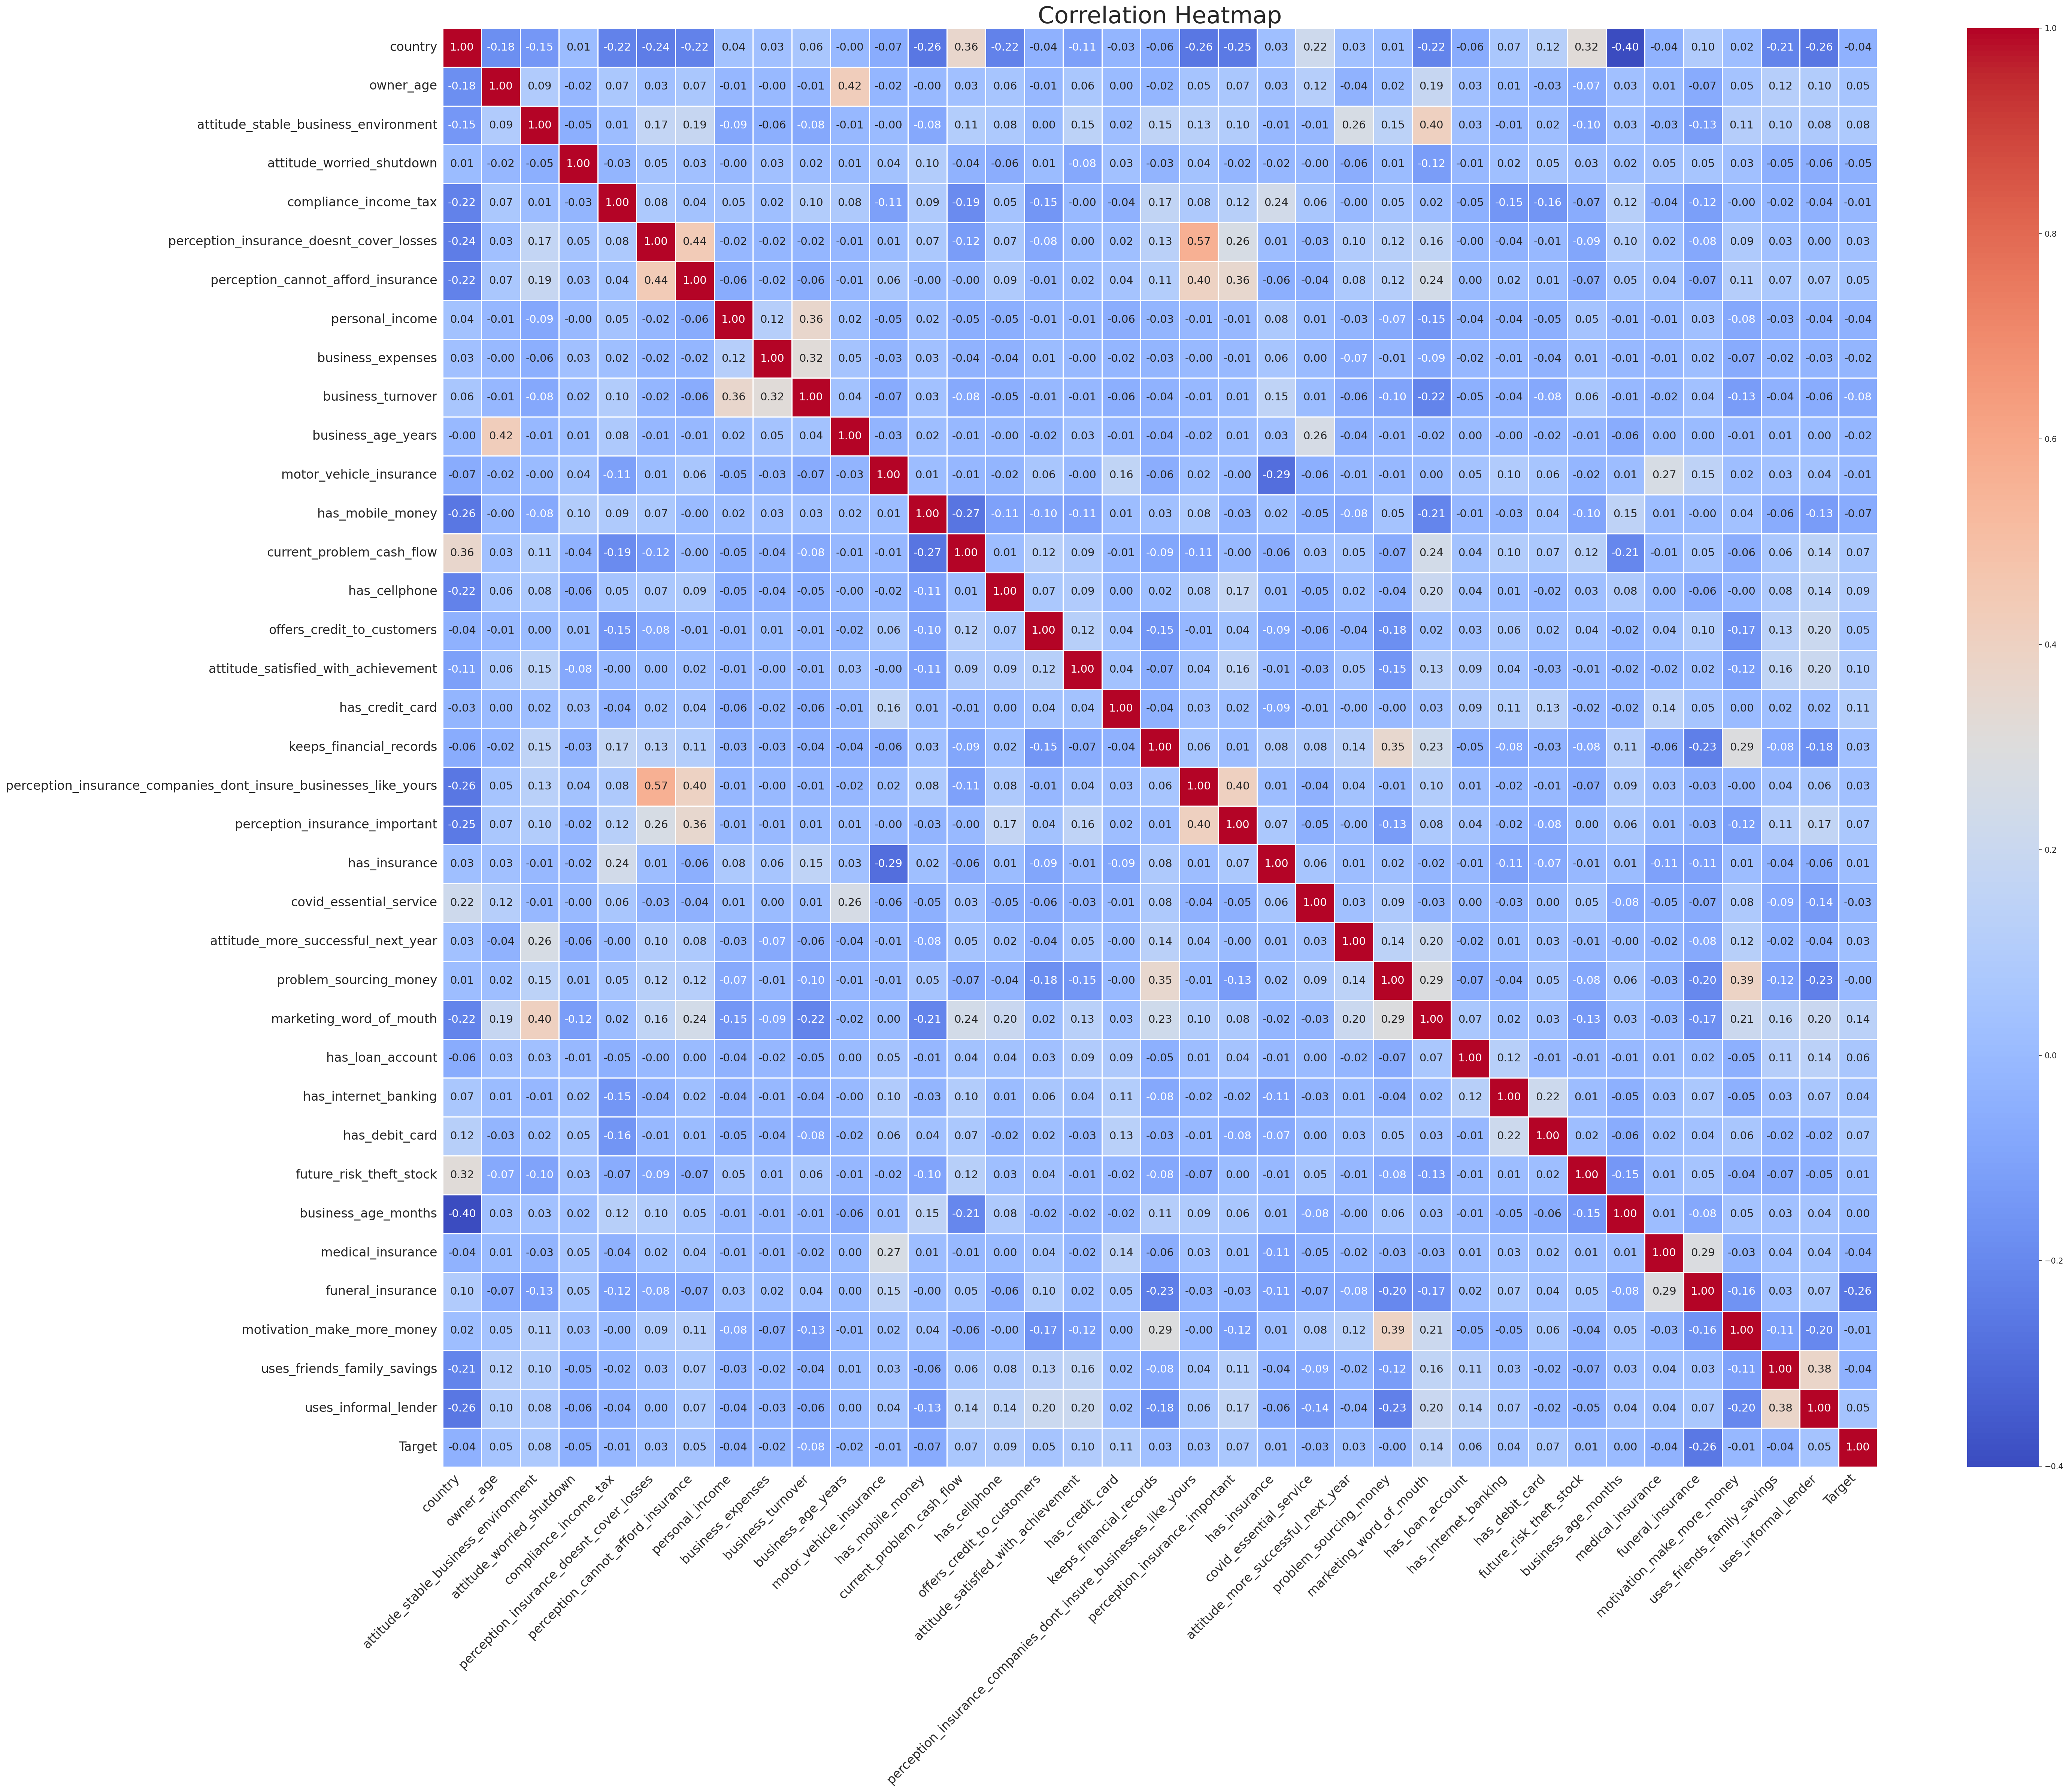

In [136]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Compute correlation matrix (NUMERIC ONLY)
matrix = train_df.corr(numeric_only=True)

# Very large figure with high resolution
plt.figure(figsize=(40, 32), dpi=150)

# Heatmap with larger annotation font
sns.heatmap(
    matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    linewidths=0.5,
    annot_kws={"size": 14}
)

plt.title("Correlation Heatmap", fontsize=30)
plt.xticks(rotation=45, ha='right', fontsize=16)
plt.yticks(rotation=0, fontsize=16)
plt.tight_layout()
plt.show()


In [139]:
features = train_df.drop(["country", "owner_age", "attitude_stable_business_environment", "attitude_worried_shutdown",
"compliance_income_tax", "perception_insurance_doesnt_cover_losses", "personal_income", "business_expenses", "business_turnover",
  "business_age_years", "has_mobile_money", "has_cellphone", "offers_credit_to_customers", "attitude_satisfied_with_achievement",
    "has_credit_card","keeps_financial_records","perception_insurance_important", "has_insurance", "covid_essential_service", "attitude_more_successful_next_year",
      "problem_sourcing_money", "has_debit_card", "business_age_months", "medical_insurance", "funeral_insurance", "motivation_make_more_money",
        "uses_friends_family_savings", "uses_informal_lender", "Target"], axis=1)
features

perception_cannot_afford_insurance  motor_vehicle_insurance  \
0                                      2                        2   
1                                      2                        1   
2                                      2                        2   
3                                      1                        2   
4                                      2                        2   
...                                  ...                      ...   
9613                                   0                        2   
9614                                   1                        2   
9615                                   1                        2   
9616                                   2                        2   
9617                                   0                        2   

      current_problem_cash_flow  \
0                             2   
1                             2   
2                             2   
3                             1   
4                             2   
...                         ...   
9613                          2   
9614                          1   
9615                          2   
9616                          2   
9617                          2   

      perception_insurance_companies_dont_insure_businesses_like_yours  \
0                                                     4                  
1                                                     3                  
2                                                     2                  
3                                                     3                  
4                                                     4                  
...                                                 ...                  
9613                                                  3                  
9614                                                  3                  
9615                                                  3                  
9616                                                  3                  
9617                                                  1                  

      marketing_word_of_mouth  has_loan_account  has_internet_banking  \
0                           1                 3                     3   
1                           1                 3                     3   
2                           0                 3                     3   
3                           0                 3                     3   
4                           1                 3                     3   
...                       ...               ...                   ...   
9613                        1                 3                     3   
9614                        0                 3                     3   
9615                        1                 3                     3   
9616                        1                 3                     3   
9617                        1                 3                     3   

      future_risk_theft_stock  
0                           0  
1                           0  
2                           1  
3                           0  
4                           0  
...                       ...  
9613                        0  
9614                        1  
9615                        0  
9616                        0  
9617                        0  

[9618 rows x 8 columns]

In [ ]:
# ========================================
# 12. FEATURE ENGINEERING
# ========================================

print("\n" + "=" * 60)
print("FEATURE ENGINEERING - GETTING STARTED")
print("=" * 60)

print("\n💡 Let's create some new features to boost your model performance!")
print("\nWe'll demonstrate 2 powerful feature engineering techniques:")

# Create copies to preserve original data
train_fe = train_df.copy()
test_fe = test_df.copy()

# ----------------------------------------
# Feature 1: Profit Margin Ratio
# ----------------------------------------
print("\n1️⃣ PROFIT MARGIN RATIO")
print("-" * 40)
print("Concept: How much profit does the business make relative to income?")
print("Formula: (personal_income - business_expenses) / personal_income")

def create_profit_margin(df):
    """
    Calculate profit margin ratio for each business.
    This indicates financial efficiency and sustainability.
    """
    # Handle division by zero and missing values
    profit_margin = []

    for idx, row in df.iterrows():
        income = row.get('personal_income', np.nan)
        expenses = row.get('business_expenses', np.nan)

        # Check if both values exist and income is not zero
        if pd.notna(income) and pd.notna(expenses) and income != 0:
            margin = (income - expenses) / income
            # Cap extreme values
            margin = max(-1, min(margin, 1))  # Keep between -1 and 1
        else:
            margin = np.nan

        profit_margin.append(margin)

    return profit_margin

train_fe['profit_margin'] = create_profit_margin(train_fe)
test_fe['profit_margin'] = create_profit_margin(test_fe)

print(f"\n✓ Created 'profit_margin' feature")
print(f"  Train - Non-null values: {train_fe['profit_margin'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['profit_margin'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['profit_margin'].describe())

# Show relationship with target
if 'Target' in train_fe.columns:
    print("\n📊 Profit Margin by Target:")
    print(train_fe.groupby('Target')['profit_margin'].agg(['mean', 'median', 'std']))

    # Visualize
    plt.figure(figsize=(10, 5))
    train_fe.boxplot(column='profit_margin', by='Target', figsize=(10, 5))
    plt.suptitle('Profit Margin Distribution by Financial Health Index',
                 fontsize=14, fontweight='bold')
    plt.xlabel('Target')
    plt.ylabel('Profit Margin Ratio')
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# Feature 2: Financial Access Score
# ----------------------------------------
print("\n2️⃣ FINANCIAL ACCESS SCORE")
print("-" * 40)
print("Concept: How many formal financial services does the business use?")
print("Includes: bank accounts, debit cards, internet banking, loans, insurance")

def create_financial_access_score(df):
    """
    Calculate a composite score of financial service access.
    Higher score = better access to formal financial services.
    """
    financial_features = [
        'has_bank_account', 'has_loan_account', 'has_internet_banking',
        'has_debit_card', 'medical_insurance', 'funeral_insurance'
    ]

    # Available features in the dataset
    available_features = [col for col in financial_features if col in df.columns]

    scores = []
    for idx, row in df.iterrows():
        score = 0
        valid_features = 0

        for feature in available_features:
            value = row.get(feature, np.nan)

            if pd.notna(value):
                valid_features += 1
                # Check for positive responses
                if value in ['Yes', 'Have now', 'have now']:
                    score += 1
                elif value in ['Used to have but don\'t have now', 'used to have']:
                    score += 0.5  # Partial credit for past access

        # Normalize by number of valid features checked
        if valid_features > 0:
            normalized_score = score / valid_features
        else:
            normalized_score = np.nan

        scores.append(normalized_score)

    return scores

train_fe['financial_access_score'] = create_financial_access_score(train_fe)
test_fe['financial_access_score'] = create_financial_access_score(test_fe)

print(f"\n✓ Created 'financial_access_score' feature")
print(f"  Train - Non-null values: {train_fe['financial_access_score'].notna().sum()}")
print(f"  Test - Non-null values: {test_fe['financial_access_score'].notna().sum()}")
print("\nSample statistics:")
print(train_fe['financial_access_score'].describe())

# Show relationship with target
if 'Target' in train_fe.columns:
    print("\n📊 Financial Access Score by Target:")
    print(train_fe.groupby('Target')['financial_access_score'].agg(['mean', 'median', 'std']))

    # Visualize
    plt.figure(figsize=(10, 5))
    train_fe.boxplot(column='financial_access_score', by='Target', figsize=(10, 5))
    plt.suptitle('Financial Access Score Distribution by Financial Health Index',
                 fontsize=14, fontweight='bold')
    plt.xlabel('Target')
    plt.ylabel('Financial Access Score')
    plt.tight_layout()
    plt.show()

# ----------------------------------------
# Summary
# ----------------------------------------
print("\n" + "=" * 60)
print("FEATURE ENGINEERING SUMMARY")
print("=" * 60)

print("\n✅ Successfully created 2 new features:")
print("\n1. profit_margin:")
print("   - Measures business profitability")
print("   - Higher values = better financial performance")
print("   - Useful for identifying financially healthy businesses")

print("\n2. financial_access_score:")
print("   - Measures access to formal financial services")
print("   - Range: 0 (no access) to 1 (full access)")
print("   - Reflects financial inclusion level")

print("\n💡 MORE FEATURE IDEAS TO TRY:")
print("   • Age bins (categorize owner_age into groups)")
print("   • Income-to-expenses ratio")
print("   • Business maturity (young vs established)")
print("   • Risk perception score (combine attitude columns)")
print("   • Country-specific features (encode regional patterns)")
print("   • Insurance coverage index")
print("   • Digital banking adoption flag")

print("\n📝 NEXT STEPS:")
print("   1. Add these features to your modeling pipeline")
print("   2. Check feature importance after training")
print("   3. Create more domain-specific features")
print("   4. Test interaction features between variables")
print("   5. Experiment with polynomial features for numerical data")

print("\n🎯 Remember: Good features can make a bigger difference than complex models!")

# Save engineered datasets (optional)
print("\n💾 Your engineered dataframes are ready:")
print(f"   • train_fe: {train_fe.shape}")
print(f"   • test_fe: {test_fe.shape}")

print("\n" + "=" * 60)